# Data Preprocessing

scanpy tutorial: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [ ]:
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install louvain
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install shap pdpbox
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 132.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load in parkinsons file

In [ ]:
#!pip install --quiet gdown

import gdown
file_id = "1wGcnEUQltYX49XDcUErT2WUsIrA9UJpF"
url     = f"https://drive.google.com/uc?id={file_id}"
output = "adata_parikinsons_processed_100k.h5ad"
gdown.download(url, output, quiet=False)

adata = ad.read_h5ad(output)
adata

Downloading...
From (original): https://drive.google.com/uc?id=1wGcnEUQltYX49XDcUErT2WUsIrA9UJpF
From (redirected): https://drive.google.com/uc?id=1wGcnEUQltYX49XDcUErT2WUsIrA9UJpF&confirm=t&uuid=f42b35e7-1a69-4c29-8f2a-5831e2c9f0ff
To: /content/adata_parikinsons_processed_100k.h5ad
100%|██████████| 5.30G/5.30G [00:39<00:00, 135MB/s] 


AnnData object with n_obs × n_vars = 99777 × 28460
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex', 'dataset_id', 'development_stage', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'batch'
    var: 'feature_id', 'feature_type', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'disease_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'sex_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    v

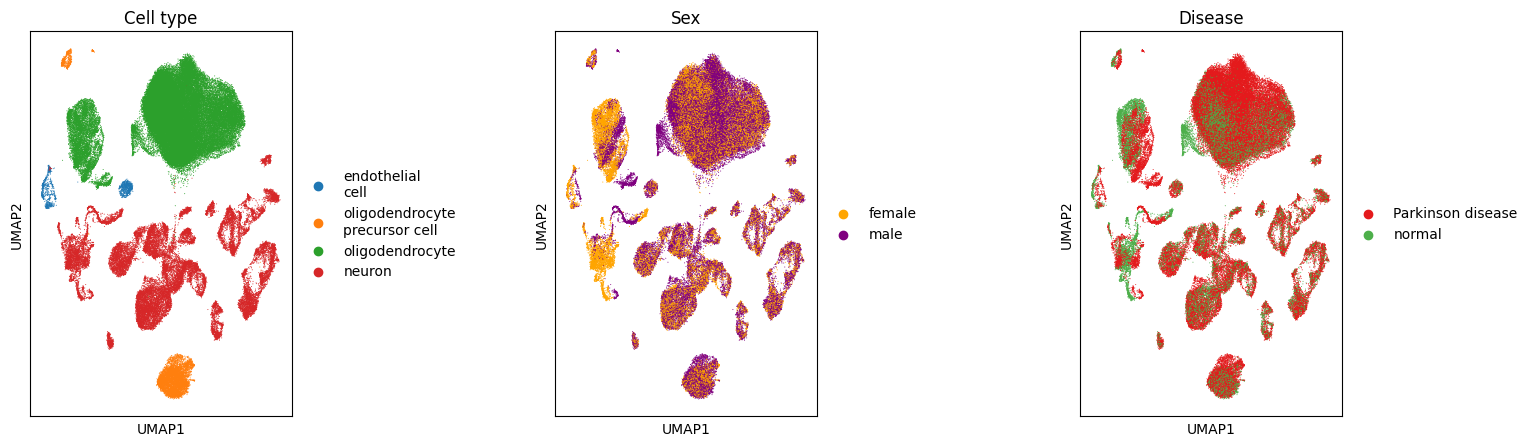

In [ ]:
# UMAP visualization
import textwrap

orig = adata.obs['cell_type'].astype(str).unique()
wrapped_map = {
    c: "\n".join(textwrap.wrap(c, 15))
    for c in orig
}
adata.obs['cell_type_wrap'] = adata.obs['cell_type'].map(wrapped_map).astype('category')
new_cats = [wrapped_map[c] for c in orig]
adata.obs['cell_type_wrap'] = adata.obs['cell_type_wrap'].cat.reorder_categories(new_cats)



# color palettes
sex_palette     = {'female': 'orange', 'male': 'purple'}
disease_palette = {'normal': '#4DAF4A', 'Parkinson disease': '#E41A1C'}


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

# cell types
sc.pl.umap(
    adata,
    color='cell_type_wrap',
    ax=axes[0],
    show=False,
    size=2,
    legend_loc='right margin',
)
axes[0].set_title('Cell type')

# sex
sc.pl.umap(
    adata,
    color='sex',
    ax=axes[1],
    show=False,
    size=2,
    palette=sex_palette,
    legend_loc='right margin',
)
axes[1].set_title('Sex')

# disease
sc.pl.umap(
    adata,
    color='disease',
    ax=axes[2],
    show=False,
    size=2,
    palette=disease_palette,
    legend_loc='right margin',
)
axes[2].set_title('Disease')
plt.subplots_adjust(wspace=1, right=1)



# Random Forest

In [ ]:
import gdown
import pickle


#    https://drive.google.com/file/d/1-26wbeKxkRet_TuEqPWq7LTL8Yl2MNqn/view?usp=drive_link
file_id = "1-26wbeKxkRet_TuEqPWq7LTL8Yl2MNqn"

url = f"https://drive.google.com/uc?id={file_id}"

output = "rf_results.pkl"
gdown.download(url, output, quiet=False)

with open(output, "rb") as f:
    results = pickle.load(f)


Downloading...
From: https://drive.google.com/uc?id=1-26wbeKxkRet_TuEqPWq7LTL8Yl2MNqn
To: /content/rf_results.pkl
100%|██████████| 7.25k/7.25k [00:00<00:00, 11.7MB/s]

Loaded object type: <class 'dict'>
Top-level keys or attributes: ['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__']


In [ ]:
# just print top 20 sex biased genes for each
for ct, sex_dict in results.items():
    print(f"\nCell type: {ct}")
    for sex in ['female', 'male']:
        df = sex_dict.get(sex)
        top20 = df.index[:20].tolist()
        print(f"  {sex.capitalize()} Top 20: {', '.join(top20)}")



Cell type: endothelial cell
  Female Top 20: HSPH1, HSP90AA1, FTX, HSP90AB1, NEAT1, MT-CO3, PTGDS, SNHG14, MT-RNR2, MT-RNR1, IGFBP2, MT-ATP6, MT-ND3, MT-ND4, ATP1A2, MT-CYB, LINC00486, MT-CO2, CACYBP, MT-CO1
  Male Top 20: HSP90AA1, CHORDC1, ID1, HSPH1, HSPA4L, CACYBP, PTGES3, APOLD1, EPAS1, BAG3, STIP1, BACE2, HSPB1, DNAJB1, GPCPD1, FKBP4, ABHD3, NR4A1, AHSA1, HSPD1

Cell type: oligodendrocyte precursor cell
  Female Top 20: BCL6, NAV2, ATRNL1, MEGF11, SAMD4A, MDGA2, VCAN, HIP1, CACNA2D3, NEAT1, MEG3, LINC00486, IL1RAPL1, TNR, SCN1A-AS1, MT-RNR2, SNHG14, SOX6, FTX, OPCML
  Male Top 20: HSP90AA1, PARD3, HIF3A, HSPH1, HSPA4L, RXRA, MAP2, CHORDC1, PTPRZ1, HSPA1A, NMT1, PTGES3, RPL13, PDZD2, NKAIN3, BCL6, CNTN3, GPR158, DNAJB1, EGFR

Cell type: oligodendrocyte
  Female Top 20: HSP90AA1, PLP1, PTGDS, CHORDC1, MT-RNR2, IL1RAPL1, LINC00486, CRYAB, CLDN11, MT-ND3, TRIM2, PTGES3, GPM6B, MT-CO2, NEAT1, MT-ATP6, SOX2-OT, MT-ND4, MT-CO3, MT-CYB
  Male Top 20: PTGES3, CHORDC1, MOBP, HSP90AA1, PDE

In [ ]:
! pip install adjustText

# Random Forest Scatter Plots
### Female Count out of 100 iterations on X axis, Male count out of 100 iterations on Y Axis

33 [ 0.44154287 -0.62790385]
113 [-0.39602748  0.32587913]


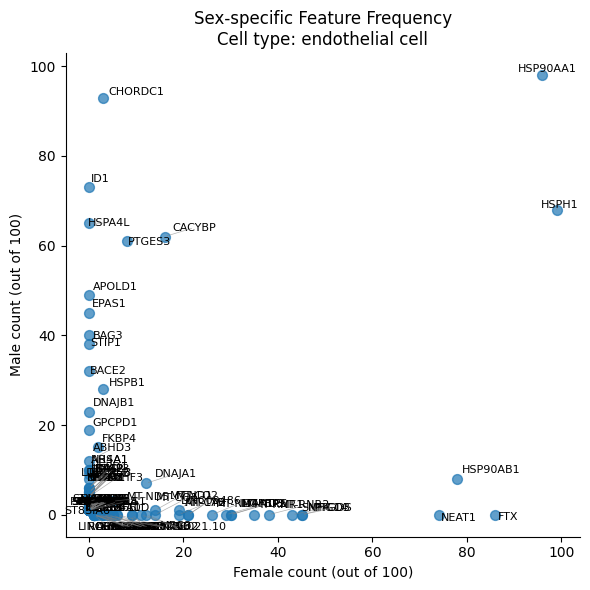

14 [-0.5507756  -0.23450982]
30 [-0.37199868  0.61122633]
46 [0.49302732 0.48236281]
98 [-0.58675209  0.08131879]
69 [ 0.63085635 -0.57086228]
103 [ 0.04215645 -0.50801907]
94 [ 0.40062926 -0.34001356]
105 [-0.12814604  0.19637496]
18 [0.06402086 0.32551905]
75 [-0.24077796  0.94233691]


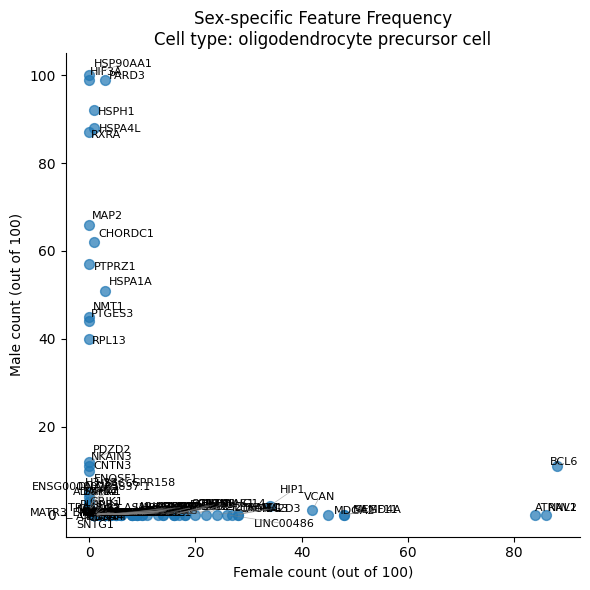

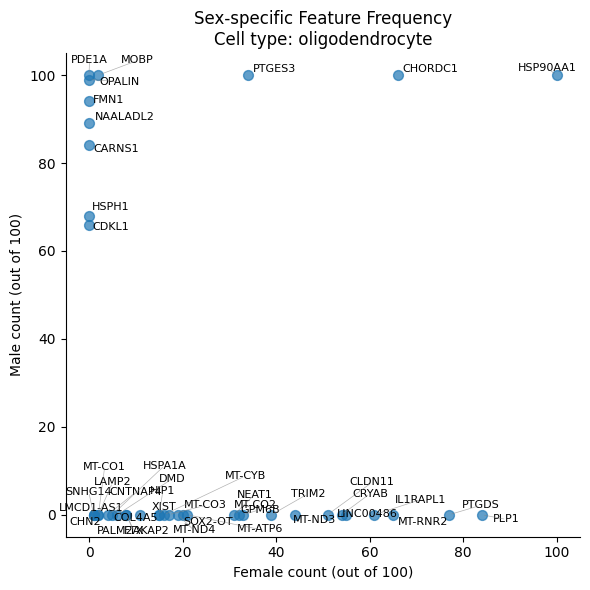

5 [0.21985048 0.96447488]
35 [-0.38226392  0.02200474]


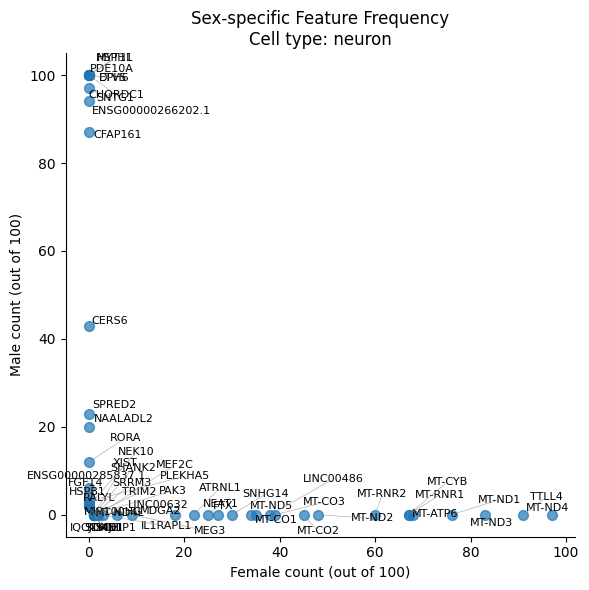

In [ ]:

from adjustText import adjust_text

for ct, sex_dict in results.items():
    # Merge female/male counts
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = pd.merge(df_f, df_m,
                        left_index=True, right_index=True,
                        how='outer').fillna(0)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(combined['female_count'], combined['male_count'], s=50, alpha=0.7)
    ax.set_title(f"Sex-specific Feature Frequency\nCell type: {ct}")
    ax.set_xlabel('Female count (out of 100)')
    ax.set_ylabel('Male count (out of 100)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    texts = []
    for feat, x, y in zip(combined.index, combined['female_count'], combined['male_count']):
        texts.append(ax.text(x, y, feat, fontsize=8))

    adjust_text(
        texts,
        autoalign='xy',
        only_move={'points':'xy', 'text':'xy'},
        expand_text=(1.1, 1.1),
        expand_points=(1.1, 1.1),
        arrowprops=dict(arrowstyle='-', color='gray', linewidth=0.5, alpha=0.6),
        ax=ax
    )

    plt.tight_layout()
    plt.show()


# Bar Plots
## For each cell type, a plot with the top female genes, plot with the top male genes, and plot with the highest average between both

<Figure size 600x500 with 0 Axes>

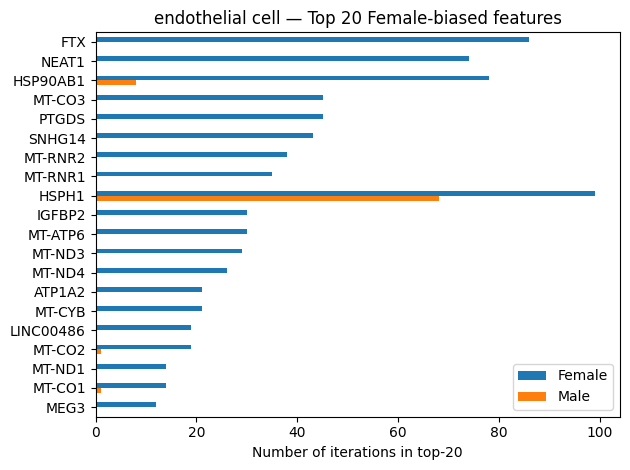

<Figure size 600x500 with 0 Axes>

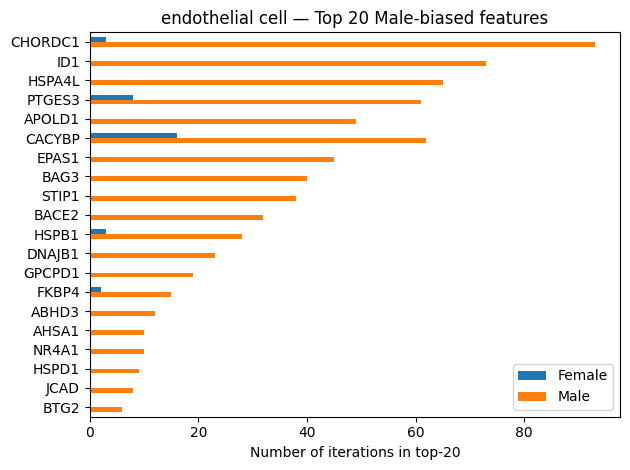

<Figure size 600x500 with 0 Axes>

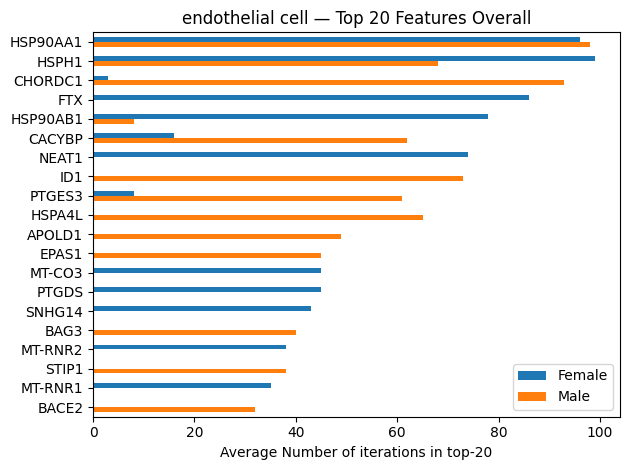

<Figure size 600x500 with 0 Axes>

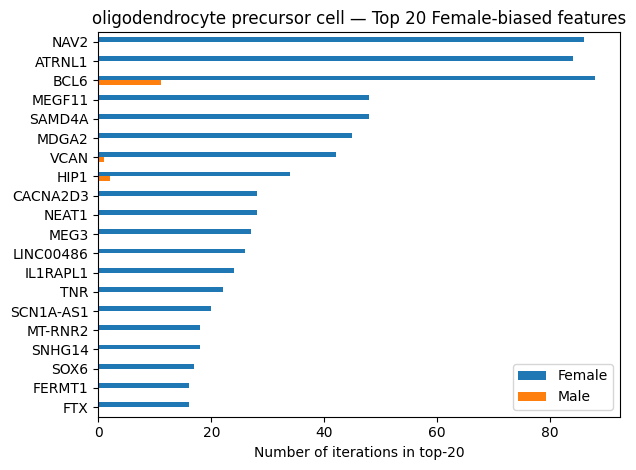

<Figure size 600x500 with 0 Axes>

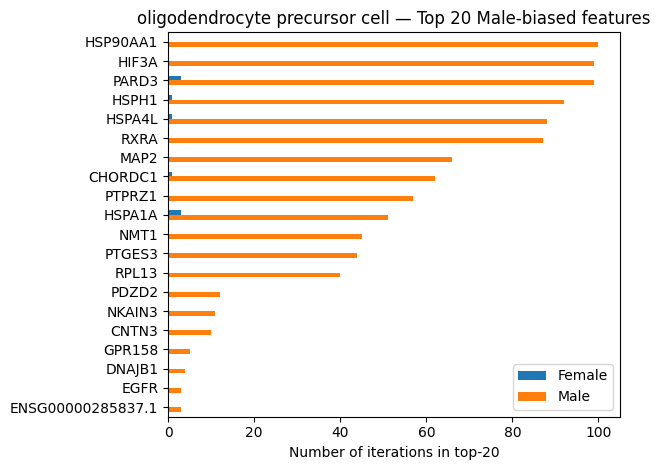

<Figure size 600x500 with 0 Axes>

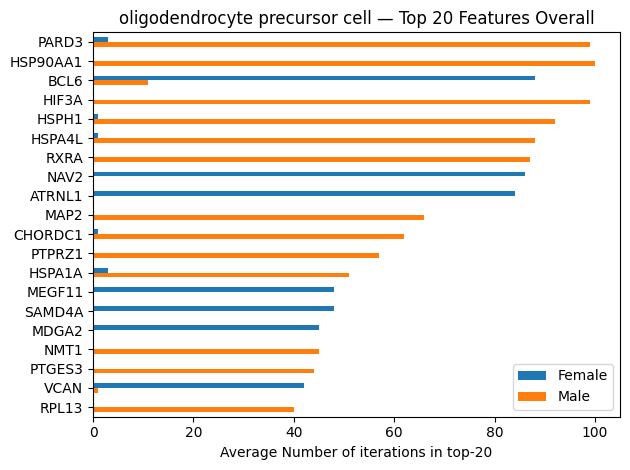

<Figure size 600x500 with 0 Axes>

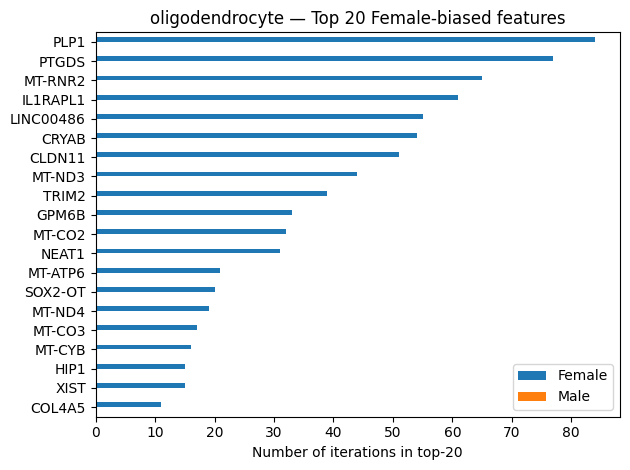

<Figure size 600x500 with 0 Axes>

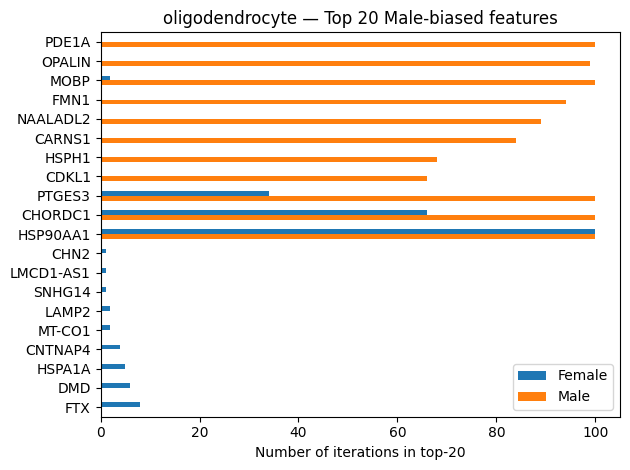

<Figure size 600x500 with 0 Axes>

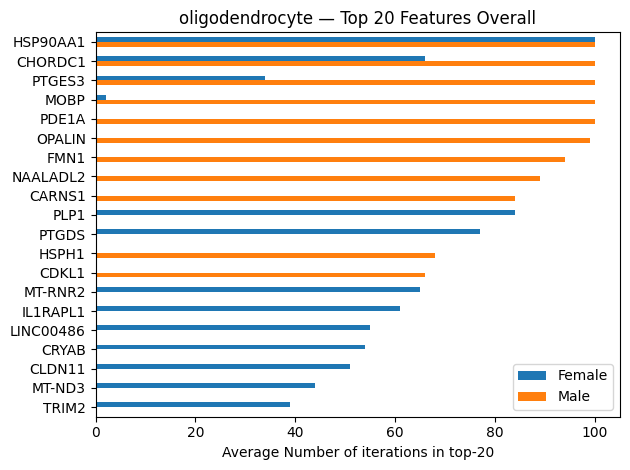

<Figure size 600x500 with 0 Axes>

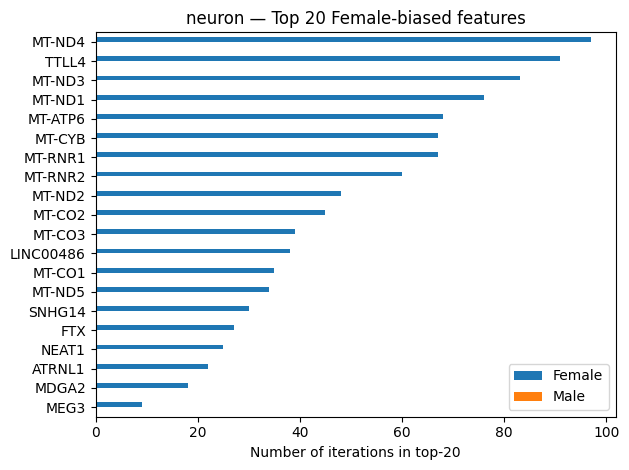

<Figure size 600x500 with 0 Axes>

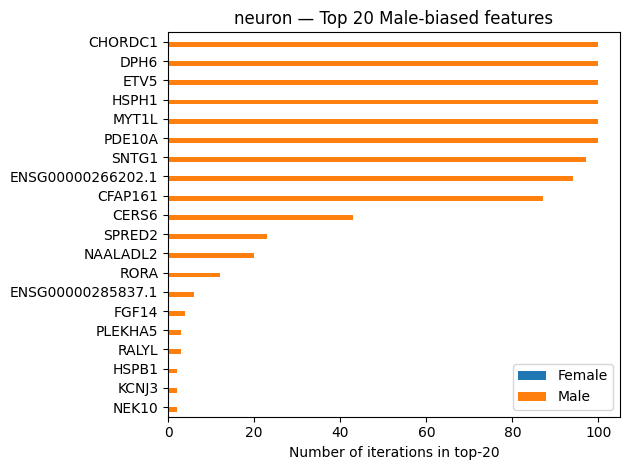

<Figure size 600x500 with 0 Axes>

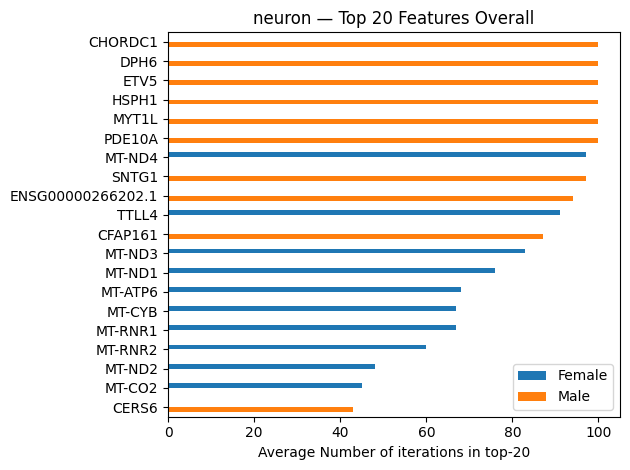

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for ct, sex_dict in results.items():
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    # compute difference between male and female counts
    combined['count_diff'] = combined['female_count'] - combined['male_count']

    # Top 20 female‐biased
    top_f = combined.nlargest(20, 'count_diff')[['female_count','male_count']]
    plt.figure(figsize=(6,5))
    ax = top_f.plot.barh()
    ax.invert_yaxis()
    ax.set_xlabel('Number of iterations in top-20')
    ax.set_title(f"{ct} — Top 20 Female-biased features")
    ax.legend(['Female','Male'])
    plt.tight_layout()
    plt.show()

    # Top 20 male‐biased
    bot_m = combined.nsmallest(20, 'count_diff')[['female_count','male_count']]
    plt.figure(figsize=(6,5))
    ax = bot_m.plot.barh()
    ax.invert_yaxis()
    ax.set_xlabel('Number of iterations in top-20')
    ax.set_title(f"{ct} — Top 20 Male-biased features")
    ax.legend(['Female','Male'])
    plt.tight_layout()
    plt.show()


    # Top‐20 Overall
    combined['avg_count'] = (combined['female_count'] + combined['male_count']) / 2
    top_overall = combined.nlargest(20, 'avg_count')[['female_count','male_count']]

    plt.figure(figsize=(6,5))
    ax = top_overall.plot.barh()
    ax.invert_yaxis()
    ax.set_xlabel("Average Number of iterations in top-20")
    ax.set_title(f"{ct} — Top 20 Features Overall")
    ax.legend(['Female','Male'])
    plt.tight_layout()
    plt.show()




<ipython-input-7-7ec5cf07f891>:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = expr_df.groupby(['cell_type','disease','sex']).mean()


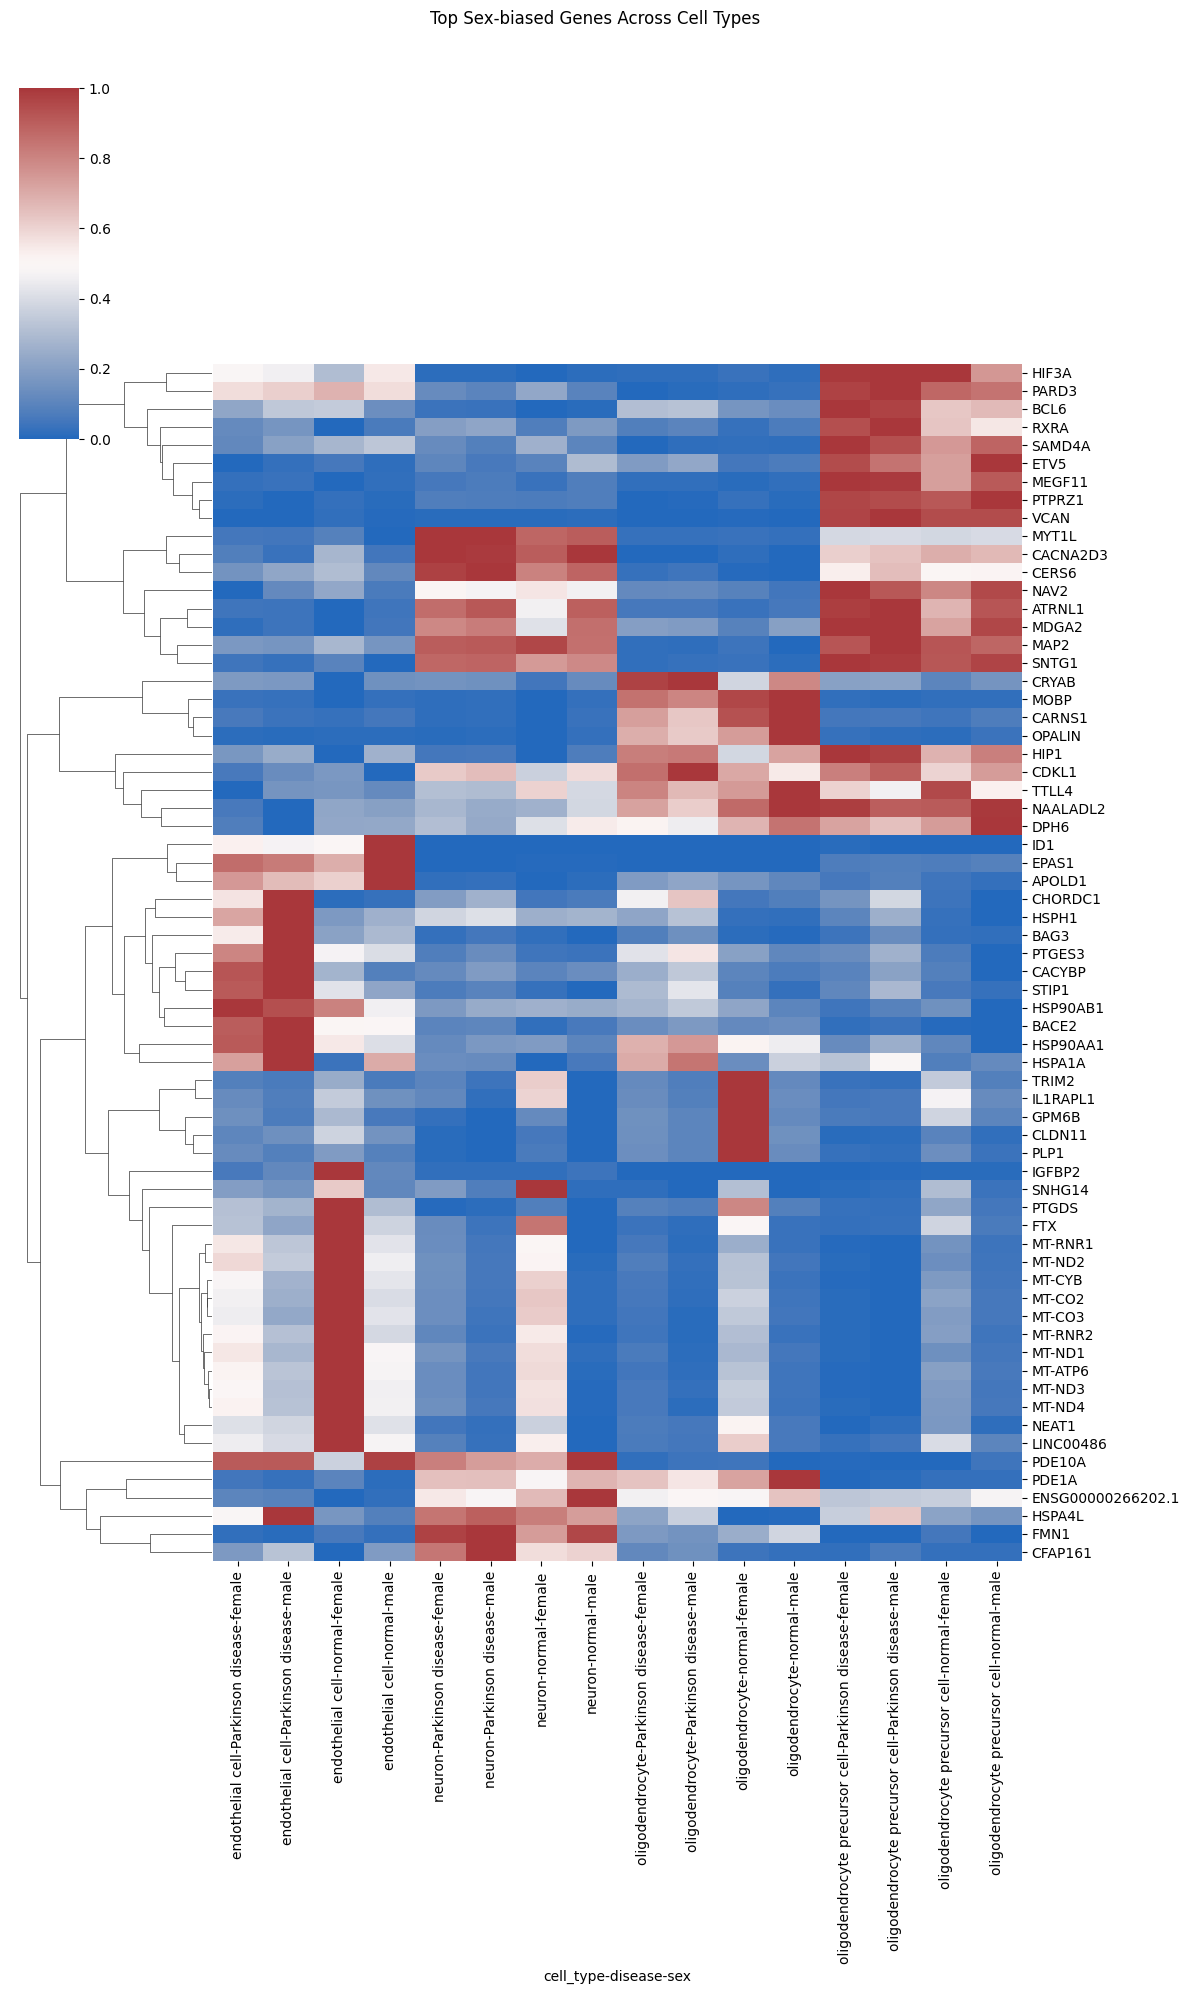

In [ ]:
# HEATMAP

from scipy import sparse

# top 10 female, male from each cell type
genes_union = set()
for ct, sex_dict in results.items():
    # merge counts
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    combined['count_diff'] = combined['female_count'] - combined['male_count']
    combined['avg_count']  = (combined['female_count'] + combined['male_count'])/2

    top_f = combined.nlargest(10, 'count_diff').index
    bot_m = combined.nsmallest(10, 'count_diff').index

    genes_union.update(top_f)
    genes_union.update(bot_m)

genes_union = list(genes_union)

# Get expression data for these genes
mat = adata[:, genes_union].X
if sparse.issparse(mat):
    mat = mat.toarray()
expr_df = pd.DataFrame(mat,
                       index=adata.obs_names,
                       columns=genes_union)

# Annotate with metadata and average per (cell_type, disease, sex)
meta = adata.obs[['cell_type','disease','sex']]
expr_df = expr_df.join(meta)
grouped = expr_df.groupby(['cell_type','disease','sex']).mean()

# Plot
heat_df = grouped[genes_union].T
heat_df.columns = pd.MultiIndex.from_tuples(
    heat_df.columns,
    names=['cell_type','disease','sex']
)
sns.clustermap(
    heat_df,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,   # z-score each gene
    figsize=(12, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
plt.suptitle("Top Sex‐biased Genes Across Cell Types", y=1.02)
plt.show()


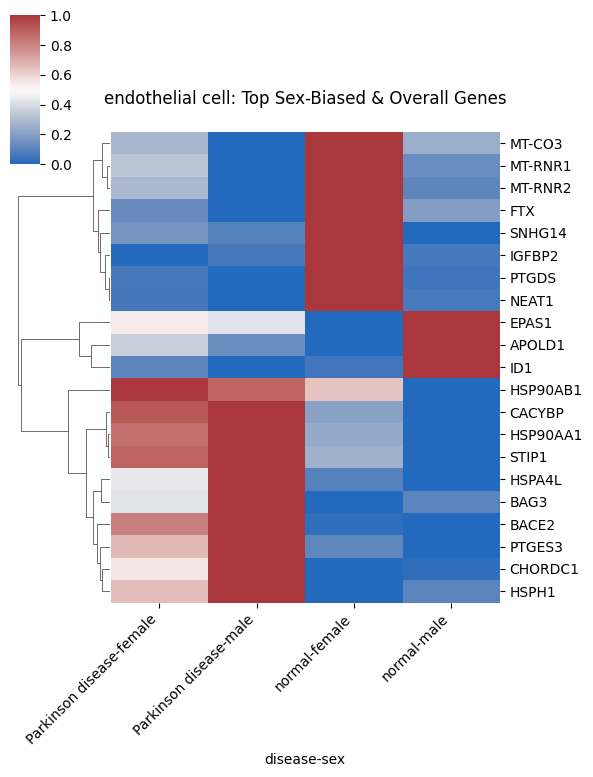

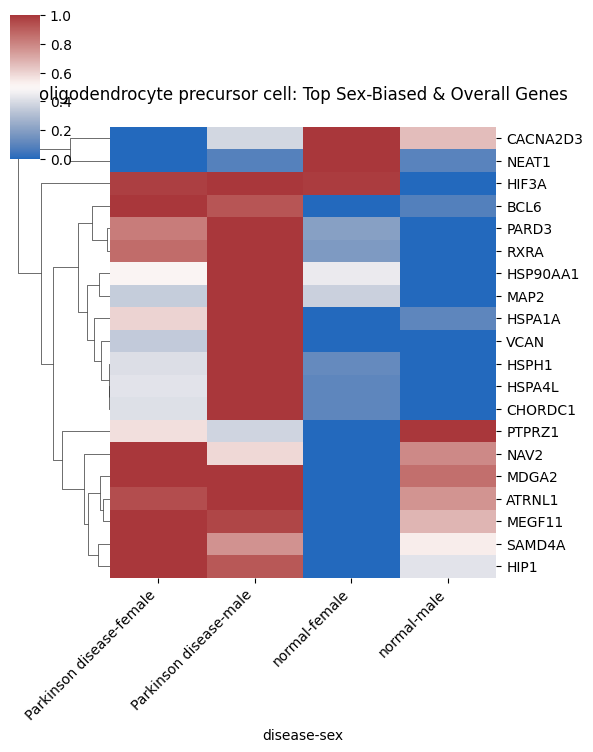

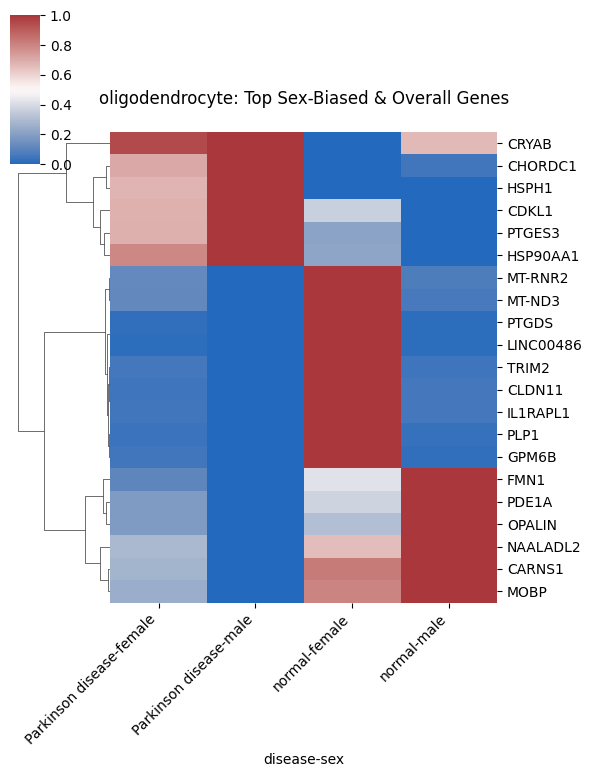

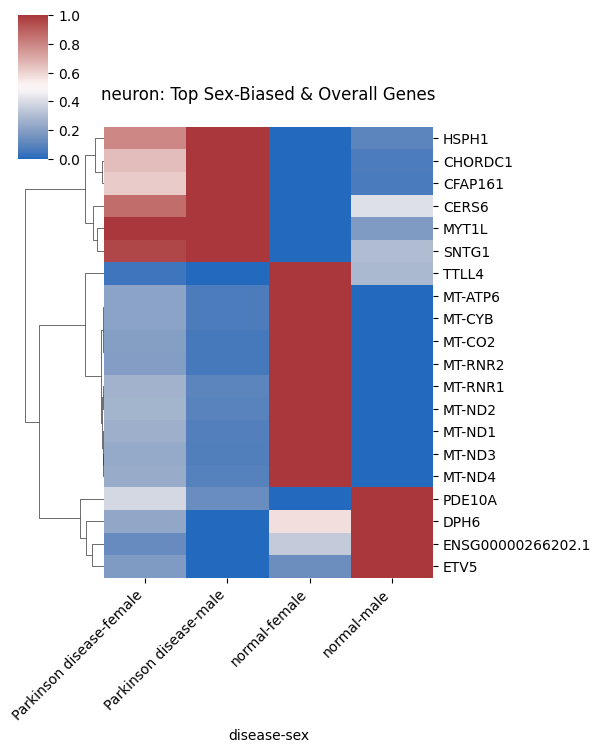

In [ ]:
# Cell Type Specific Heatmaps
for ct, sex_dict in results.items():
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].  rename(columns={'count':'male_count'})
    comb = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0).astype(int)
    )
    comb['diff'] = comb['female_count'] - comb['male_count']
    comb['avg']  = (comb['female_count'] + comb['male_count'])/2

    top_f = comb.nlargest(10, 'diff').index
    bot_m = comb.nsmallest(10, 'diff').index
    top_o = comb.nlargest(10, 'avg').index
    genes_ct = list({*top_f, *bot_m, *top_o})

    # average per (disease,sex)
    mask = adata.obs['cell_type'] == ct
    mat = adata[mask, genes_ct].X
    if sparse.issparse(mat): mat = mat.toarray()
    df_mat = pd.DataFrame(mat, index=adata.obs_names[mask], columns=genes_ct)
    df_mat = df_mat.join(adata.obs.loc[mask, ['disease','sex']])

    grouped = df_mat.groupby(['disease','sex'], observed=True).mean()
    heat_df = grouped[genes_ct].T

    # plot
    cg = sns.clustermap(
        heat_df,
        row_cluster=True,
        col_cluster=False,
        cmap='vlag',
        standard_scale=0,
        figsize=(6, len(genes_ct)*0.25 + 3),
        xticklabels=True,
        yticklabels=True
    )
    cg.ax_heatmap.set_title(f"{ct}: Top Sex‐Biased & Overall Genes", pad=20)

    cg.ax_heatmap.set_xticklabels(
        cg.ax_heatmap.get_xticklabels(),
        rotation=45,
        ha='right'
    )

    plt.show()

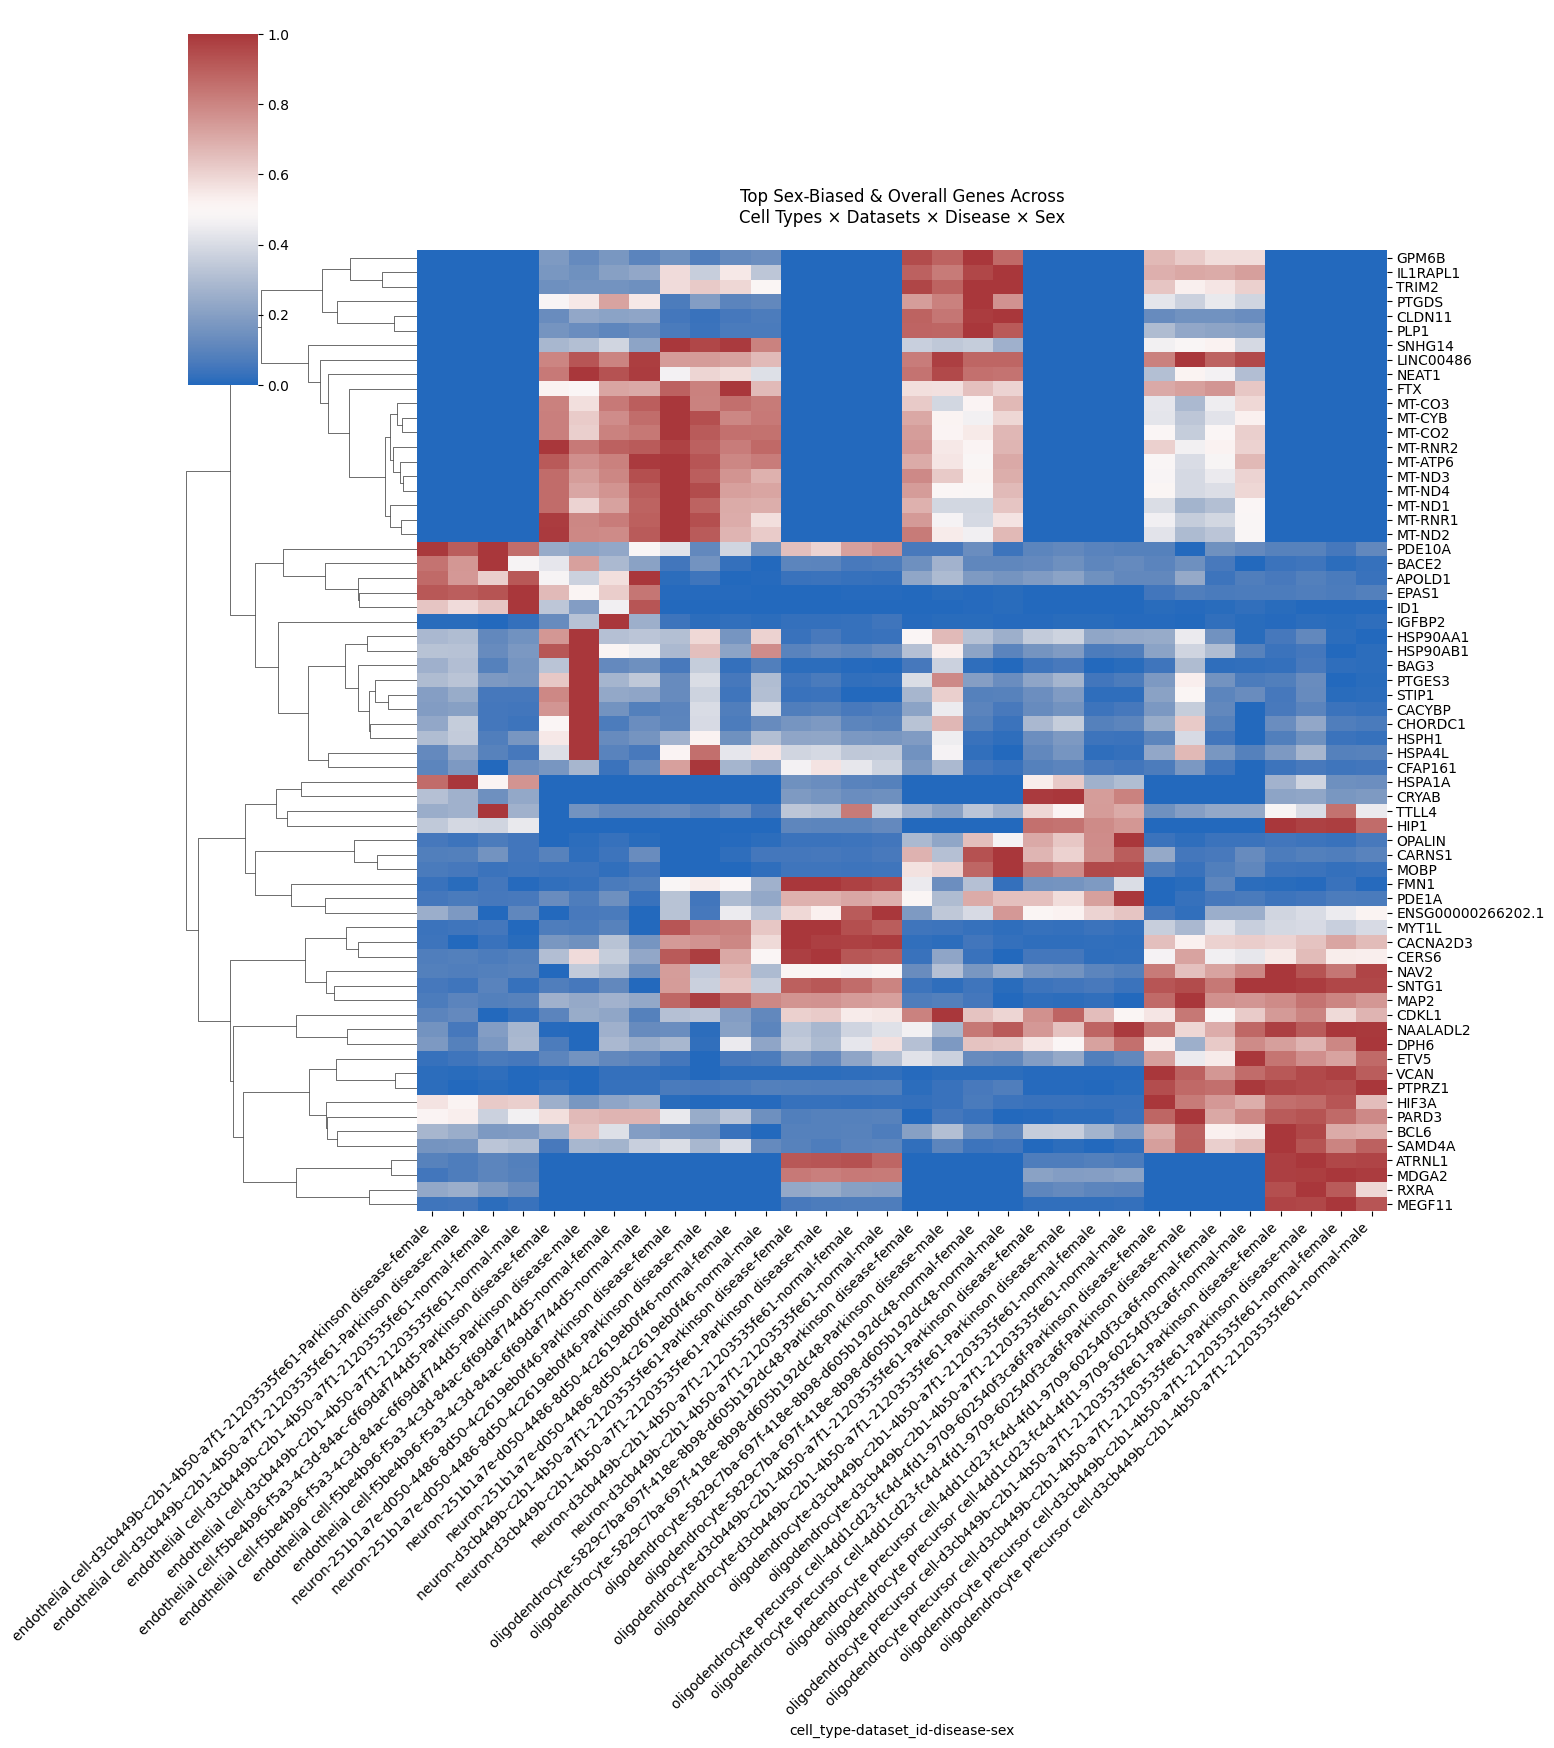

In [ ]:
# Heatmap including Dataset
for ct, sex_dict in results.items():
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].rename(columns={'count':'male_count'})
    combined = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True,
                 how='outer')
        .fillna(0)
        .astype(int)
    )
    combined['count_diff'] = combined['female_count'] - combined['male_count']
    combined['avg_count']  = (combined['female_count'] + combined['male_count']) / 2

    genes_union.update(combined.nlargest(10, 'count_diff').index)
    genes_union.update(combined.nsmallest(10, 'count_diff').index)
    genes_union.update(combined.nlargest(10, 'avg_count').index)

genes_union = list(genes_union)

mat = adata[:, genes_union].X
if sparse.issparse(mat):
    mat = mat.toarray()
expr = pd.DataFrame(mat, index=adata.obs_names, columns=genes_union)

meta = adata.obs[['cell_type','dataset_id','disease','sex']]
expr = expr.join(meta)
grouped = (
    expr
    .groupby(['cell_type','dataset_id','disease','sex'], observed=True)
    .mean()
)

heat_df = grouped[genes_union].T
heat_df.columns = pd.MultiIndex.from_tuples(
    heat_df.columns,
    names=['cell_type','dataset_id','disease','sex']
)

heat_df = heat_df.sort_index(
    axis=1, level=['cell_type','dataset_id','disease','sex']
)

heat_df = heat_df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Plot
cg = sns.clustermap(
    heat_df,
    row_cluster=True,      # cluster genes
    col_cluster=False,     # keep column ordering
    cmap='vlag',
    standard_scale=0,      # z-score each gene (row)
    figsize=(14, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
cg.ax_heatmap.set_title(
    "Top Sex-Biased & Overall Genes Across\nCell Types × Datasets × Disease × Sex",
    y=1.02
)
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


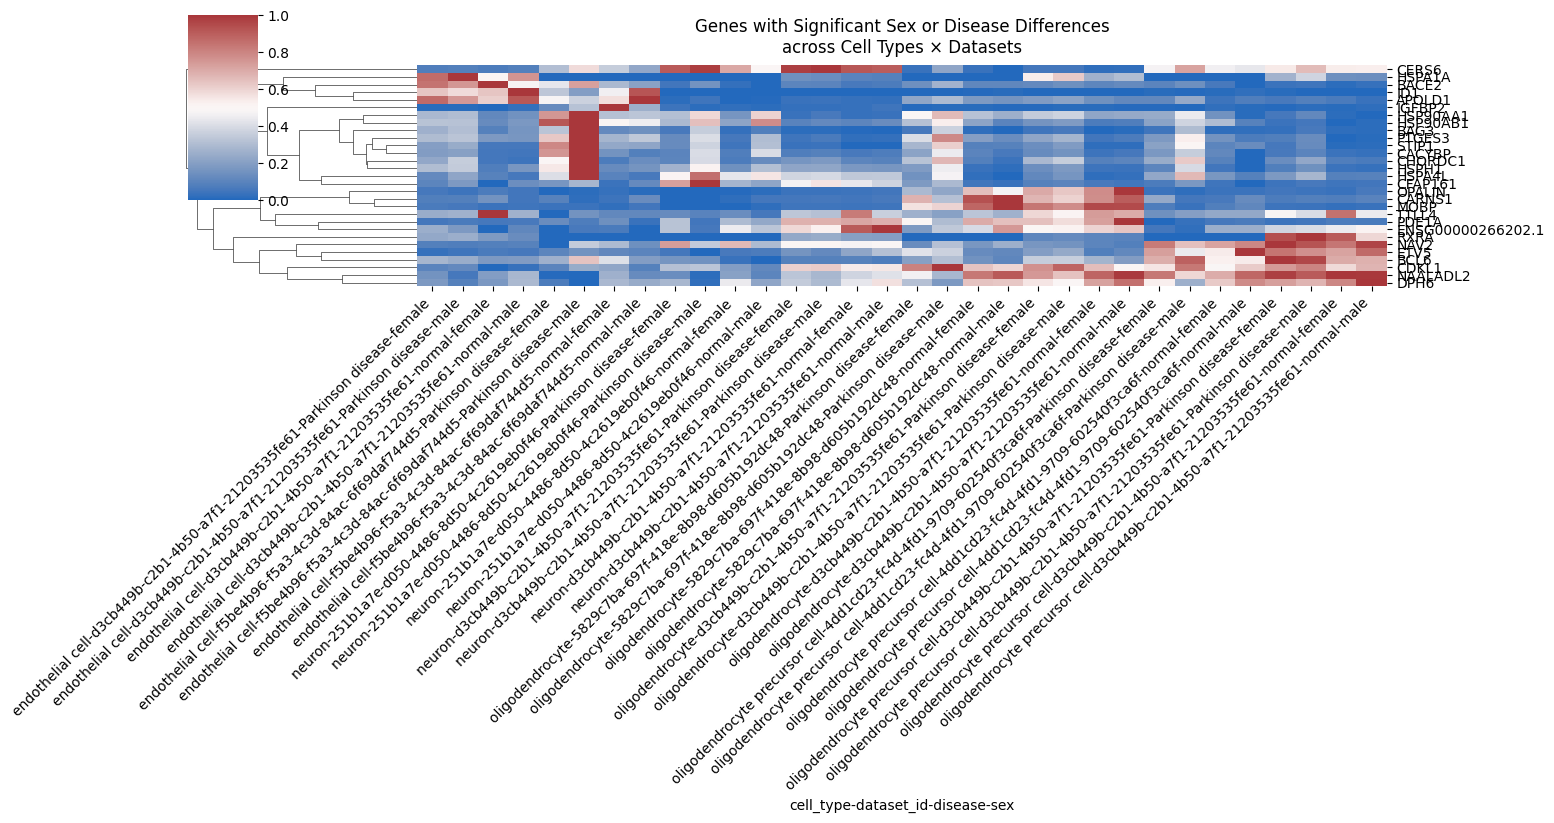

In [ ]:
# Filter to genes with ≥1 SD difference in sex or disease
# manually z-score each gene (row)
heat_df_z = heat_df.sub(heat_df.mean(axis=1), axis=0) \
                  .div(heat_df.std(axis=1), axis=0)

# compute female–male within each (cell_type, dataset_id, disease)
fem = heat_df_z.xs('female', axis=1, level='sex')
mal = heat_df_z.xs('male',   axis=1, level='sex')
sex_diff = (fem - mal).abs()

# compute healthy–diseased within each (cell_type, dataset_id, sex)
healthy  = heat_df_z.xs('normal',  axis=1, level='disease')
diseased = heat_df_z.xs('Parkinson disease', axis=1, level='disease')
disease_diff = (healthy - diseased).abs()

# pick genes where ANY diff > threshold (e.g. 1 SD)
threshold = 1.0
mask = (sex_diff  > threshold).any(axis=1) | \
       (disease_diff > threshold).any(axis=1)
sig_genes = heat_df_z.index[mask]

# subset both the raw and z-scored tables
heat_df   = heat_df.loc[sig_genes]
genes_union = list(sig_genes)

# Plot
cg = sns.clustermap(
    heat_df,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,
    figsize=(14, len(genes_union)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
cg.ax_heatmap.set_title(
    "Genes with Significant Sex or Disease Differences\nacross Cell Types × Datasets",
    y=1.02
)
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

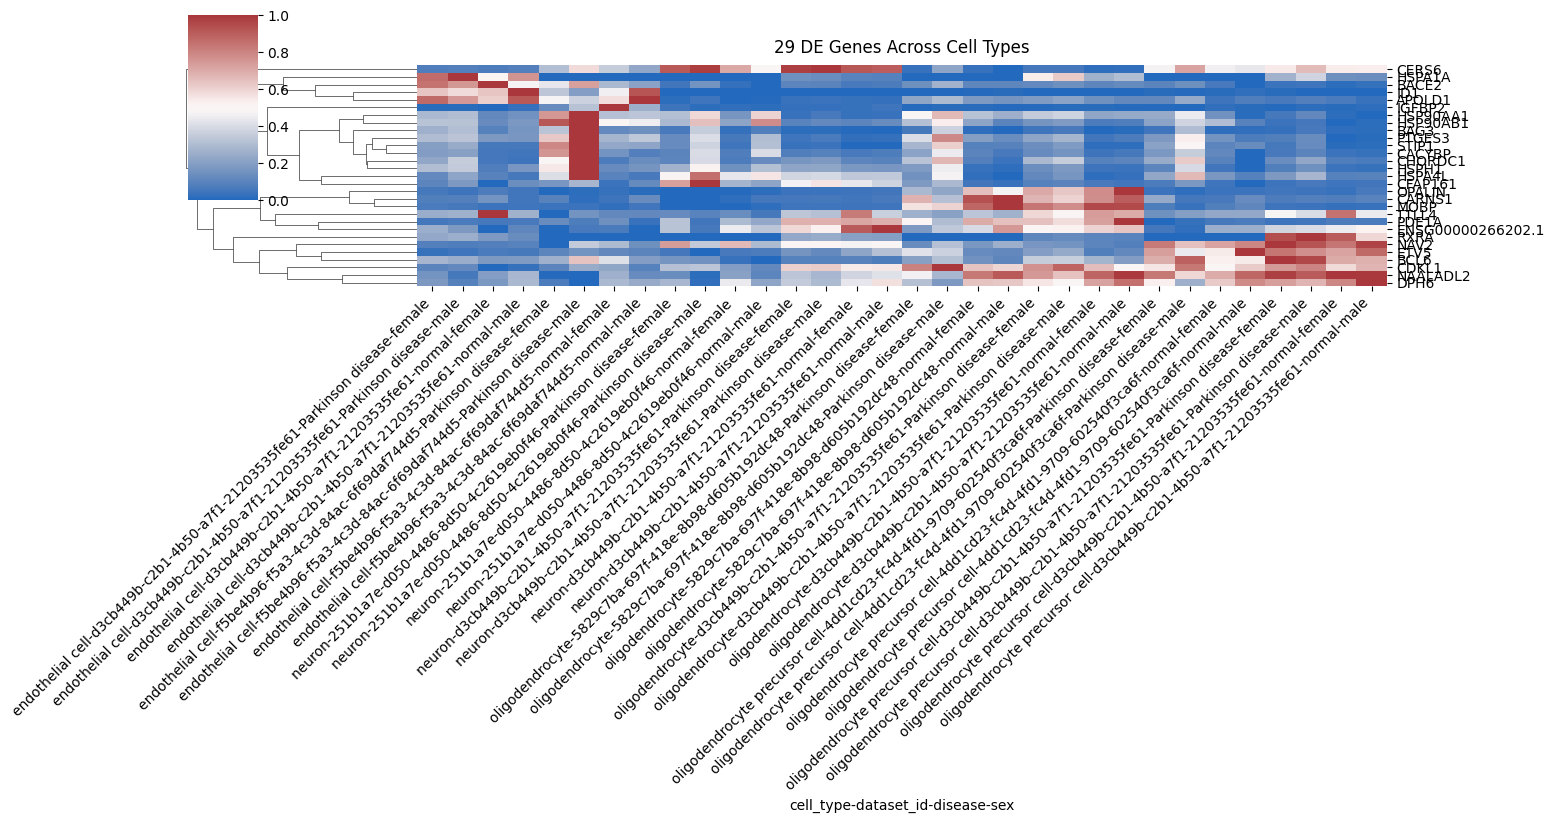

In [ ]:

sig_genes = set()
alpha = 0.05

for ct in adata.obs['cell_type'].unique():
    ad = adata[adata.obs['cell_type']==ct].copy()

    sc.tl.rank_genes_groups(ad, 'sex', reference='male',    method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='female')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

    sc.tl.rank_genes_groups(ad, 'sex', reference='female',  method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='male')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

    sc.tl.rank_genes_groups(ad, 'disease', reference='normal',   method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='Parkinson disease')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

    sc.tl.rank_genes_groups(ad, 'disease', reference='Parkinson disease', method='wilcoxon')
    df = sc.get.rank_genes_groups_df(ad, group='normal')
    sig_genes |= set(df.loc[df['pvals_adj']<alpha, 'names'])

sig_genes = list(sig_genes)

heat_df_sub = heat_df.loc[heat_df.index.intersection(sig_genes)]

heat_df_sub = heat_df_sub.loc[:, (heat_df_sub != 0).any(axis=0)]

# plot
cg = sns.clustermap(
    heat_df_sub,
    row_cluster=True,
    col_cluster=False,
    cmap='vlag',
    standard_scale=0,
    figsize=(14, len(heat_df_sub)*0.25 + 3),
    xticklabels=True,
    yticklabels=True
)
cg.ax_heatmap.set_title(
    f"{heat_df_sub.shape[0]} DE Genes Across Cell Types",
    y=1.02
)
plt.setp(cg.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()

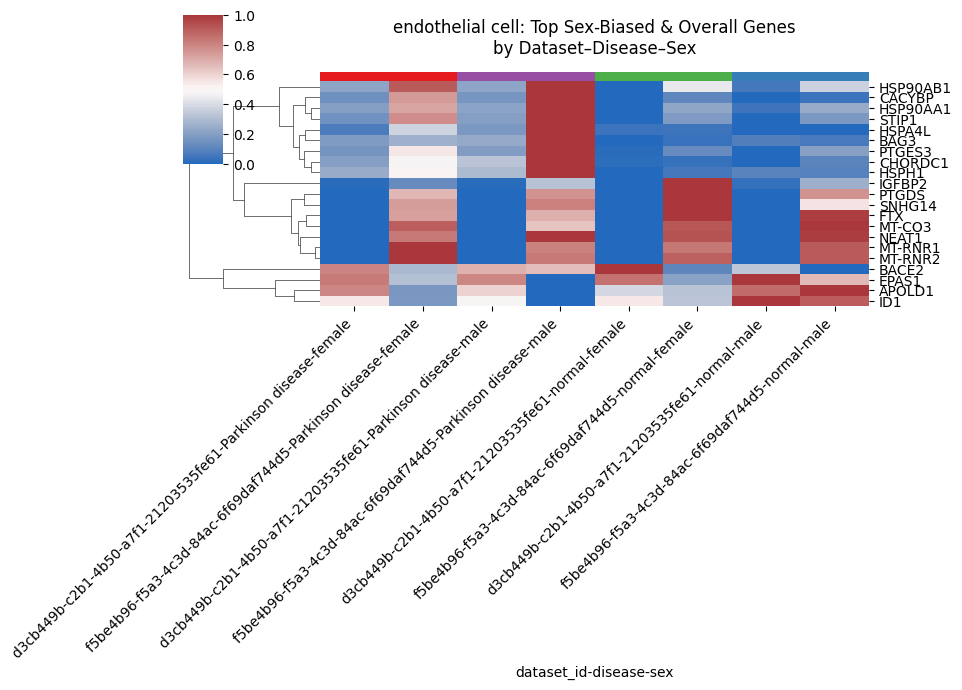

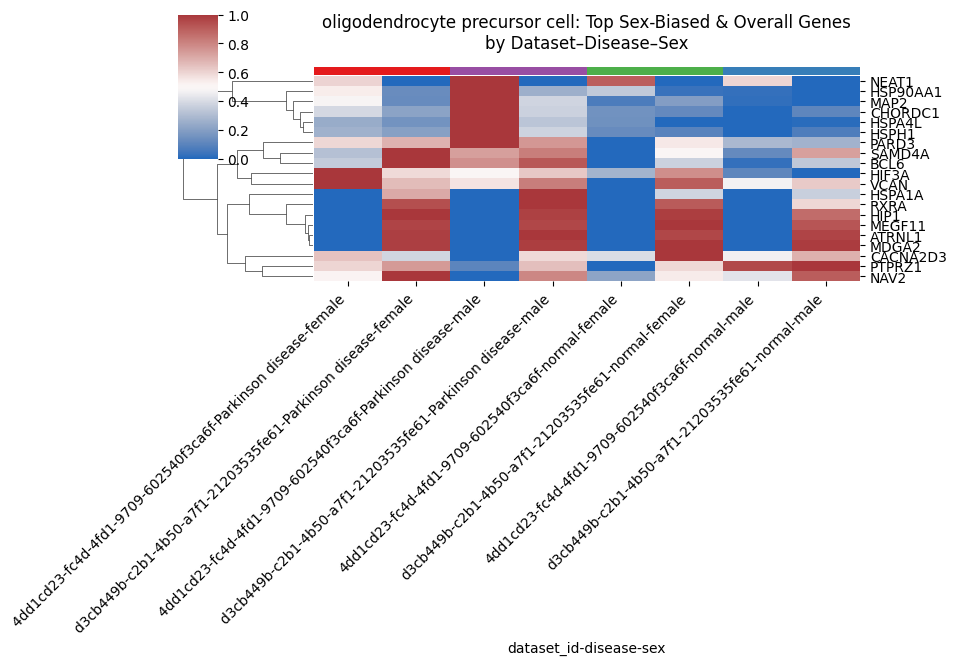

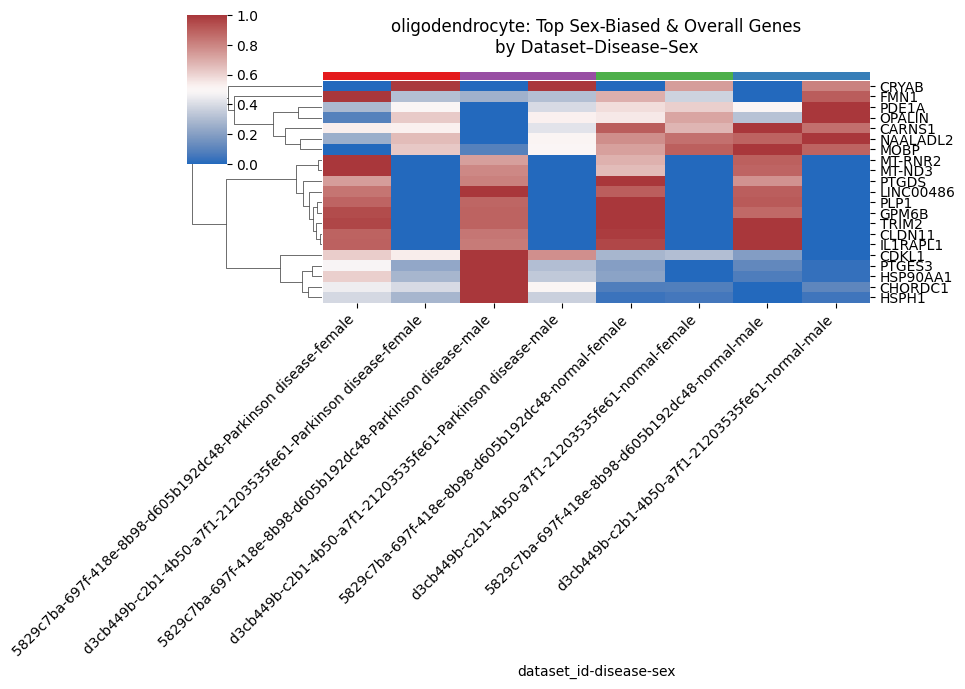

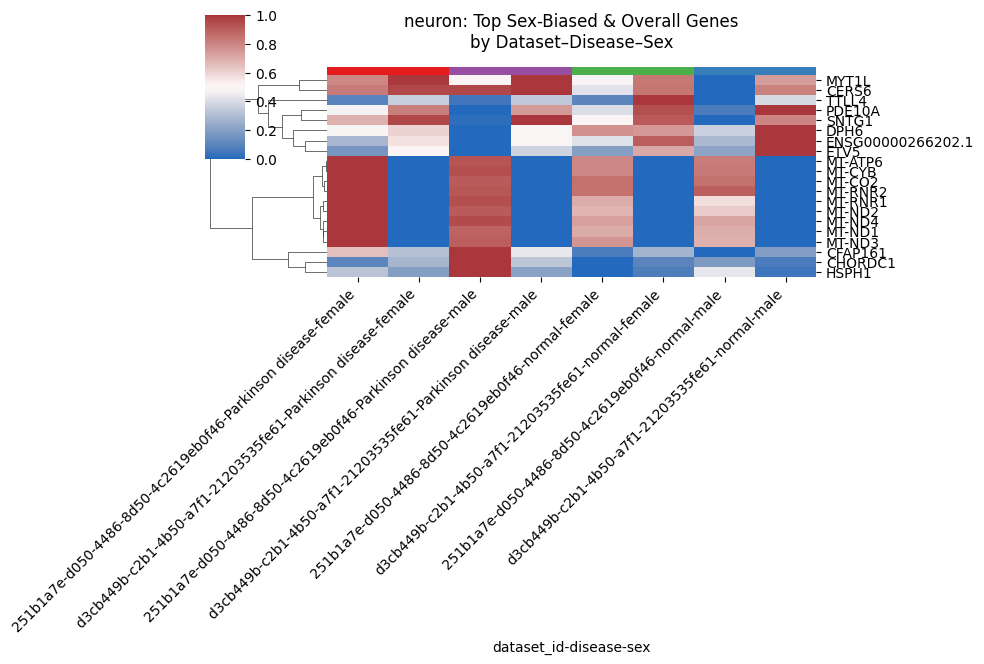

In [ ]:
# Dataset and cell type specific heatmaps

palette = {
    "normal-female":            "#4DAF4A",
    "normal-male":              "#377EB8",
    "Parkinson disease-female": "#E41A1C",
    "Parkinson disease-male":   "#984EA3",
}

for ct, sex_dict in results.items():
    # pick union of top‐10 female/male/overall genes
    df_f = sex_dict['female'].rename(columns={'count':'female_count'})
    df_m = sex_dict['male'].  rename(columns={'count':'male_count'})
    comb = (
        pd.merge(df_f, df_m,
                 left_index=True, right_index=True, how='outer')
          .fillna(0).astype(int)
    )
    comb['diff'] = comb['female_count'] - comb['male_count']
    comb['avg']  = (comb['female_count'] + comb['male_count'])/2

    top_f = comb.nlargest(10, 'diff').index
    bot_m = comb.nsmallest(10, 'diff').index
    top_o = comb.nlargest(10, 'avg').index
    genes_ct = list({*top_f, *bot_m, *top_o})

    # average per (dataset_id, disease, sex)
    mask = adata.obs['cell_type'] == ct
    mat = adata[mask, genes_ct].X
    if sparse.issparse(mat):
        mat = mat.toarray()
    df_mat = pd.DataFrame(mat,
                          index=adata.obs_names[mask],
                          columns=genes_ct)
    df_mat = df_mat.join(
        adata.obs.loc[mask, ['dataset_id','disease','sex']]
    )
    grouped = df_mat.groupby(
        ['dataset_id','disease','sex'], observed=True
    ).mean()
    heat_df = grouped[genes_ct].T
    heat_df.columns = pd.MultiIndex.from_tuples(
        heat_df.columns,
        names=['dataset_id','disease','sex']
    )

    new_cols = sorted(
        heat_df.columns,
        key=lambda t: (t[1], t[2], t[0])
    )
    heat_df = heat_df[new_cols]

    group_keys = [f"{d}-{s}" for (_ds, d, s) in heat_df.columns]
    col_colors = [palette[k] for k in group_keys]

    # plot
    cg = sns.clustermap(
        heat_df,
        row_cluster=True,
        col_cluster=False,
        cmap='vlag',
        standard_scale=0,
        figsize=(8, len(genes_ct)*0.25 + 3),
        xticklabels=True,
        yticklabels=True,
        col_colors=[col_colors]
    )
    cg.ax_heatmap.set_title(
        f"{ct}: Top Sex‐Biased & Overall Genes\nby Dataset–Disease–Sex",
        pad=20
    )
    cg.ax_heatmap.set_xticklabels(
        cg.ax_heatmap.get_xticklabels(),
        rotation=45, ha='right'
    )

    plt.show()


# Gene Set Enrichment Analysis

In [ ]:
! pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 kB 13.2 MB/s eta 0:00:00


Performing enrichment analysis with gseapy...
Processing cell type: endothelial cell
    [female] Running ORA against GO_Biological_Process_2025 (attempt 1)
    [female] Running ORA against KEGG_2021_Human (attempt 1)
    [male] Running ORA against GO_Biological_Process_2025 (attempt 1)
    [male] Running ORA against KEGG_2021_Human (attempt 1)
Processing cell type: oligodendrocyte precursor cell
    [female] Running ORA against GO_Biological_Process_2025 (attempt 1)
    [female] Running ORA against KEGG_2021_Human (attempt 1)
    [male] Running ORA against GO_Biological_Process_2025 (attempt 1)
    [male] Running ORA against KEGG_2021_Human (attempt 1)
Processing cell type: oligodendrocyte
    [female] Running ORA against GO_Biological_Process_2025 (attempt 1)
    [female] Running ORA against KEGG_2021_Human (attempt 1)
    [male] Running ORA against GO_Biological_Process_2025 (attempt 1)
    [male] Running ORA against KEGG_2021_Human (attempt 1)
Processing cell type: neuron
    [fema

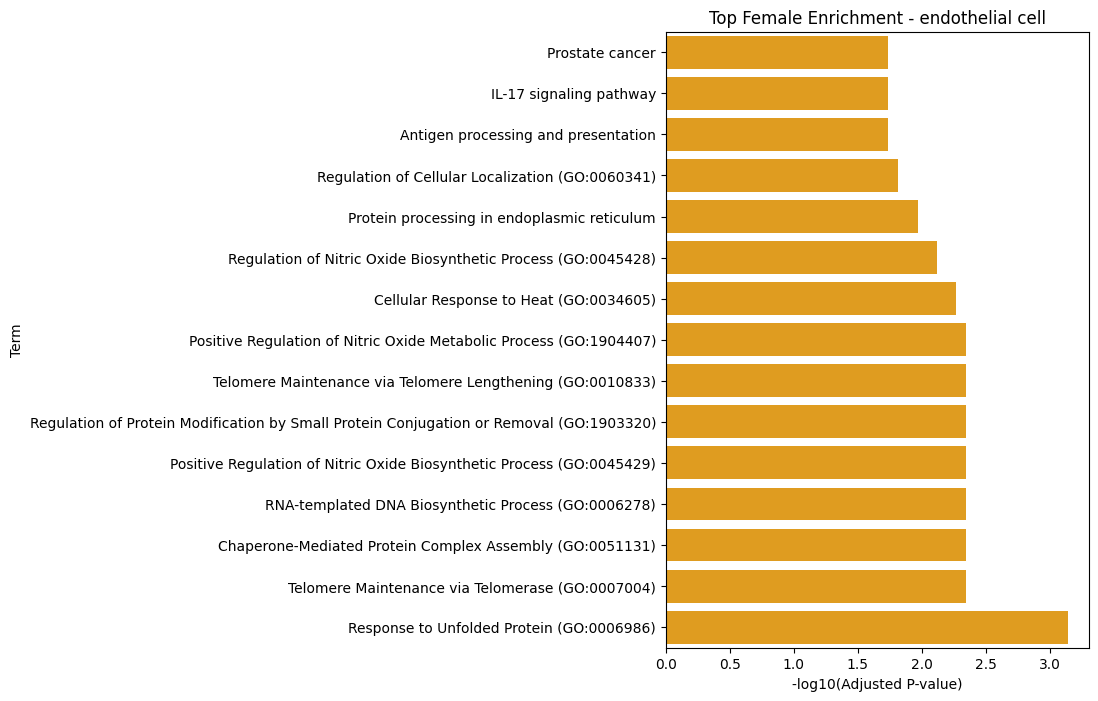

<ipython-input-22-ca038b621ae6>:150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


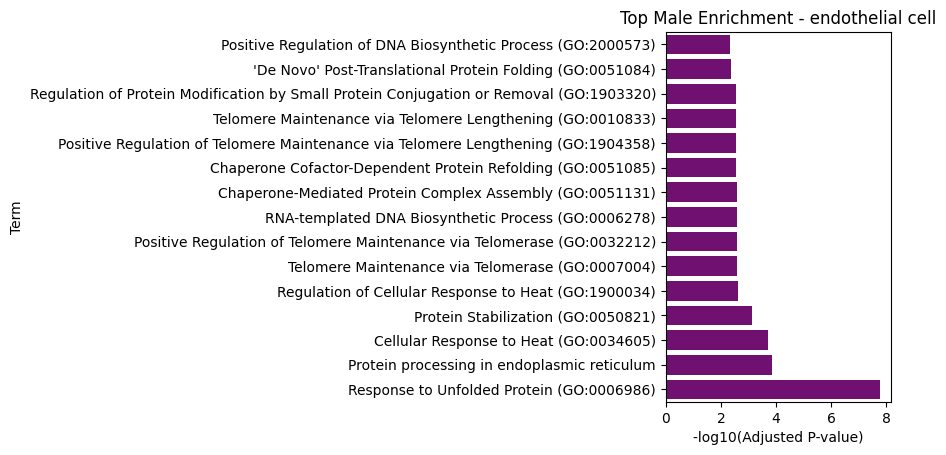

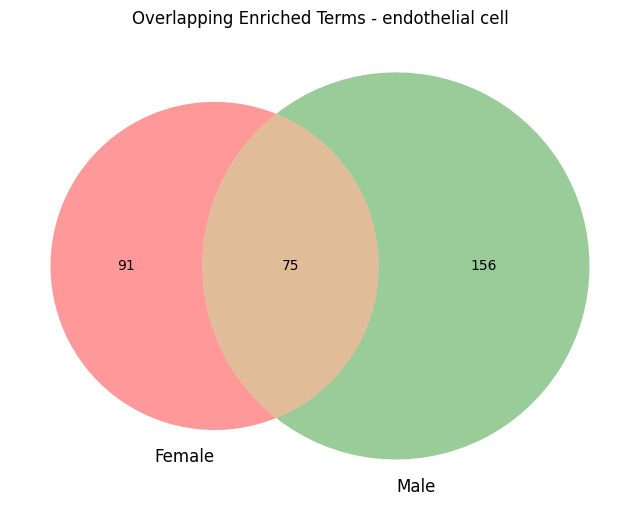

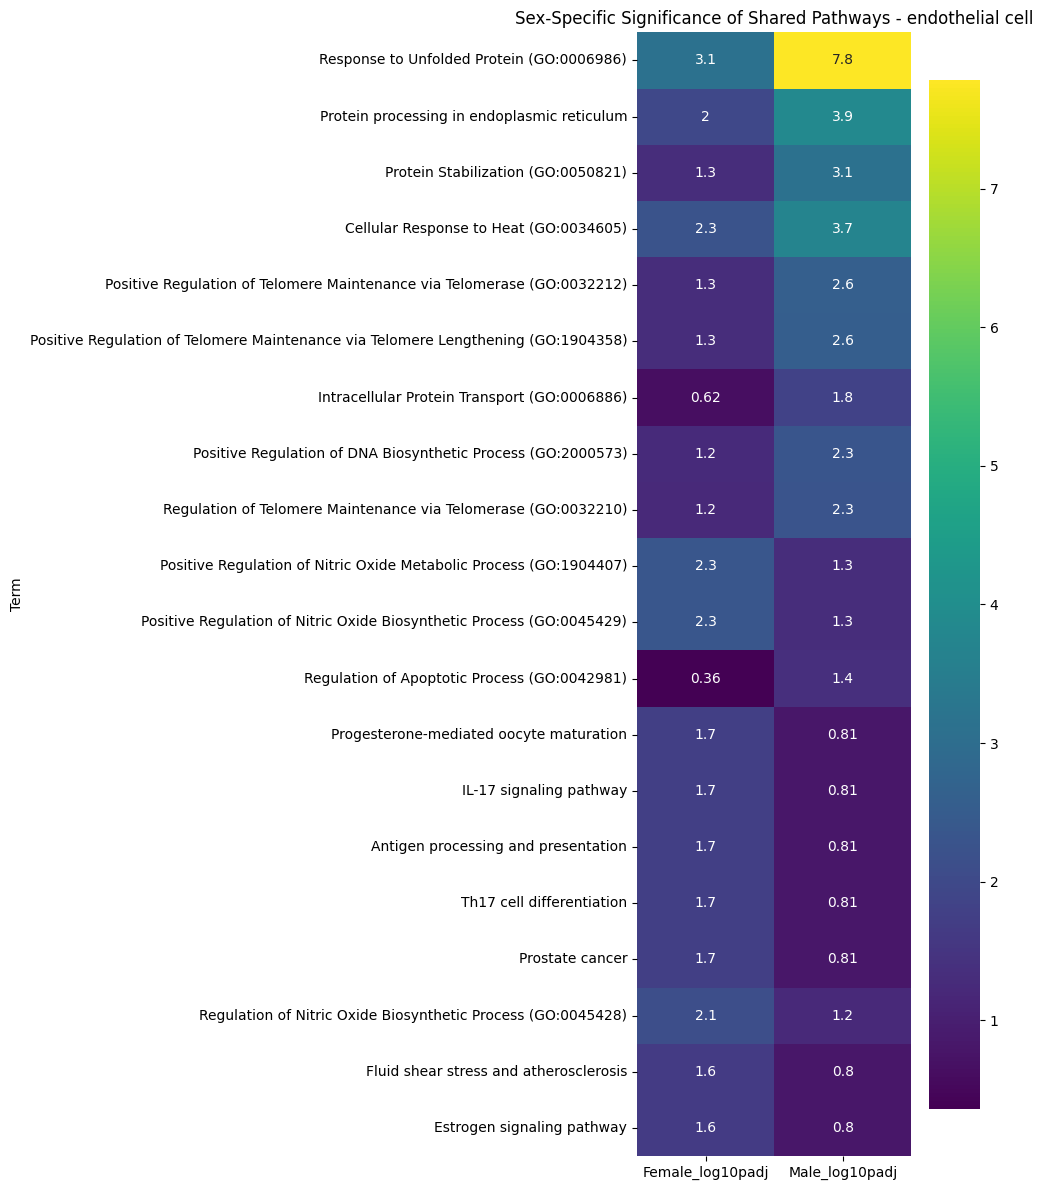

Creating visualizations for oligodendrocyte precursor cell


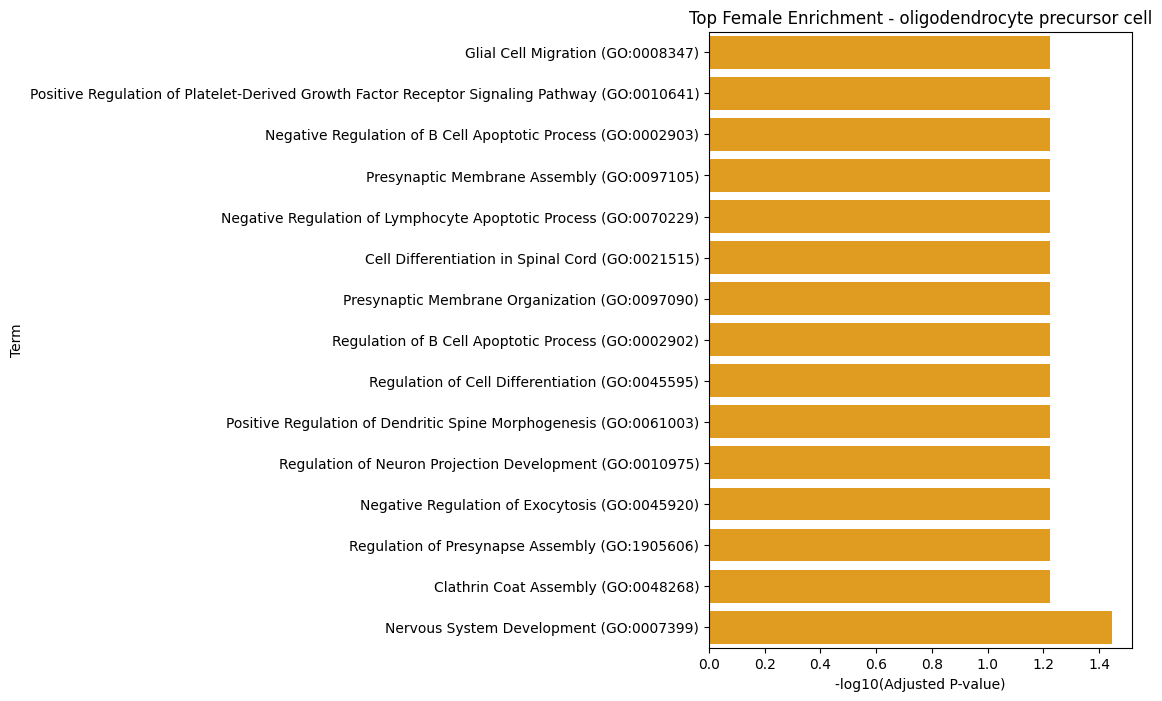

<ipython-input-22-ca038b621ae6>:150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


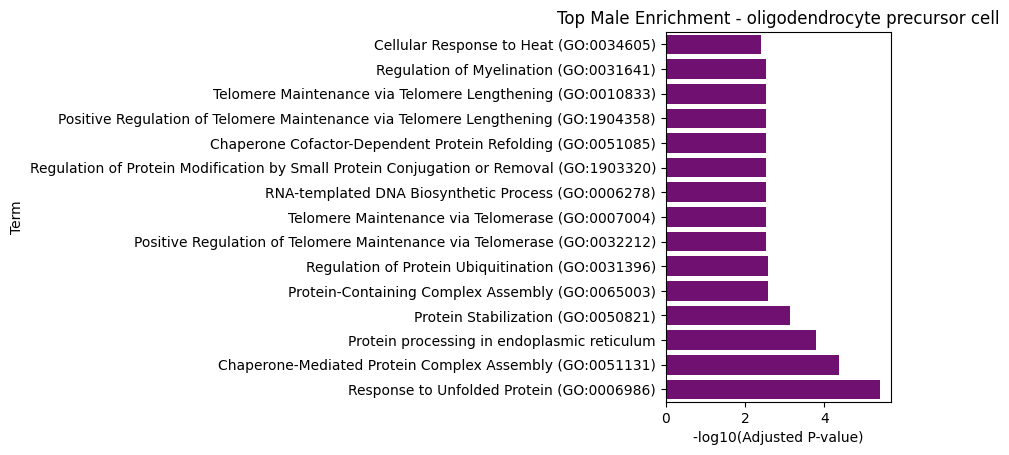

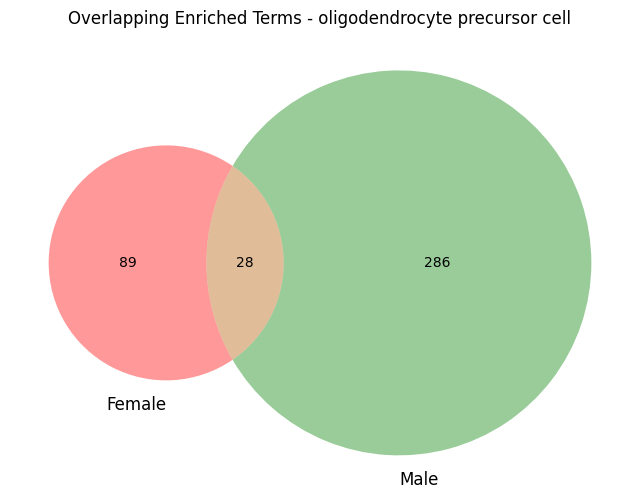

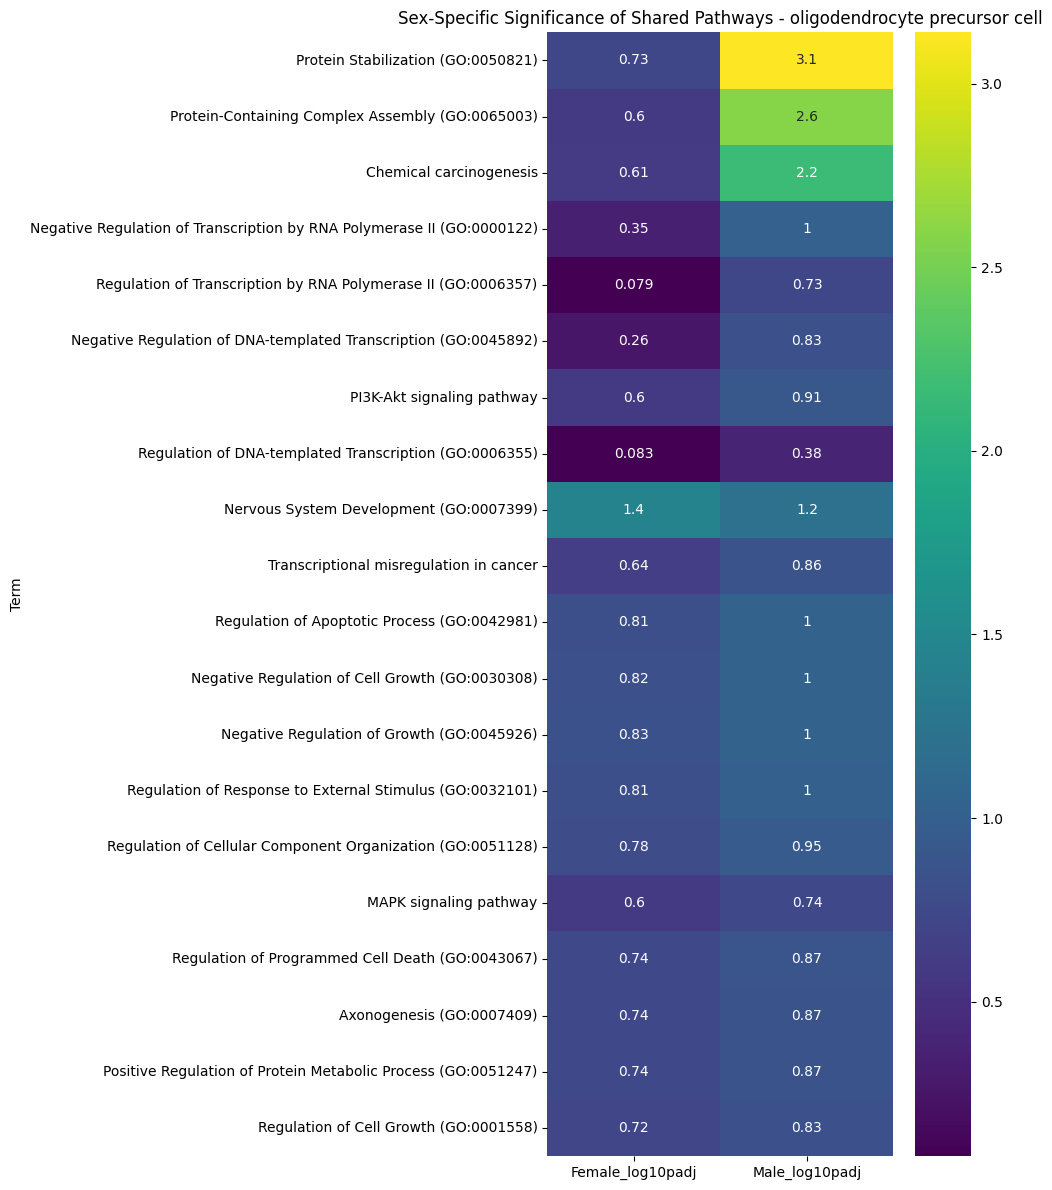

Creating visualizations for oligodendrocyte


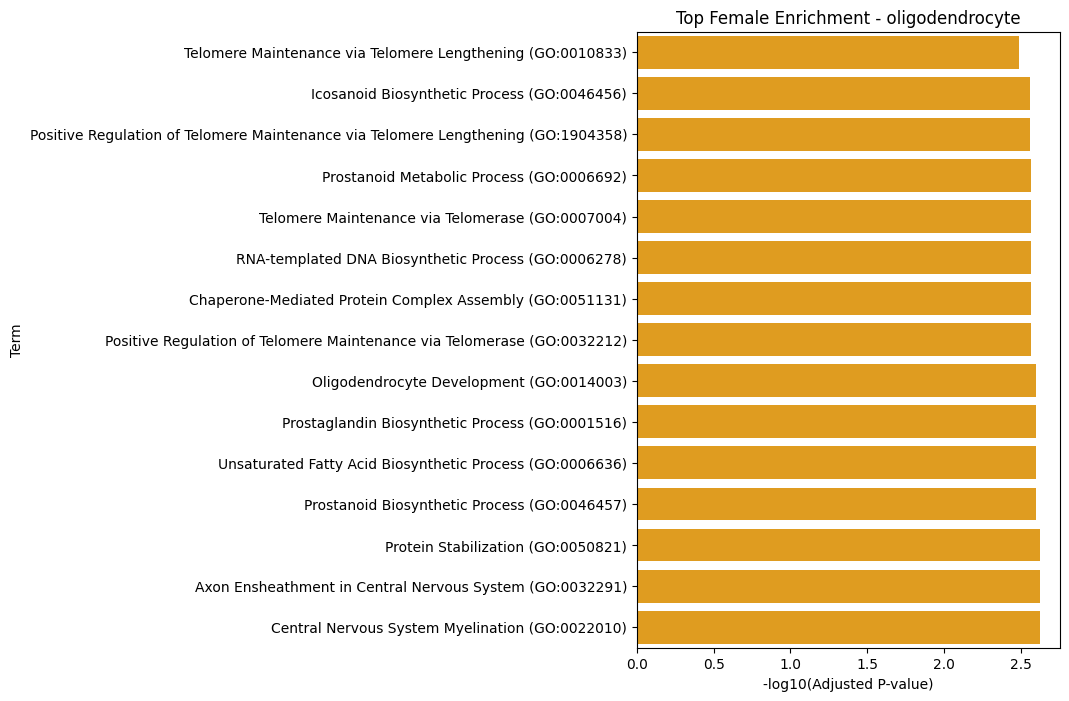

<ipython-input-22-ca038b621ae6>:150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


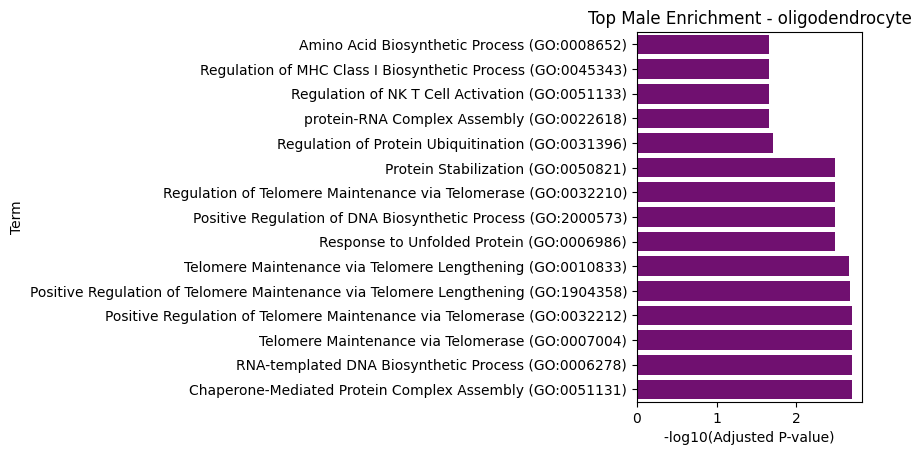

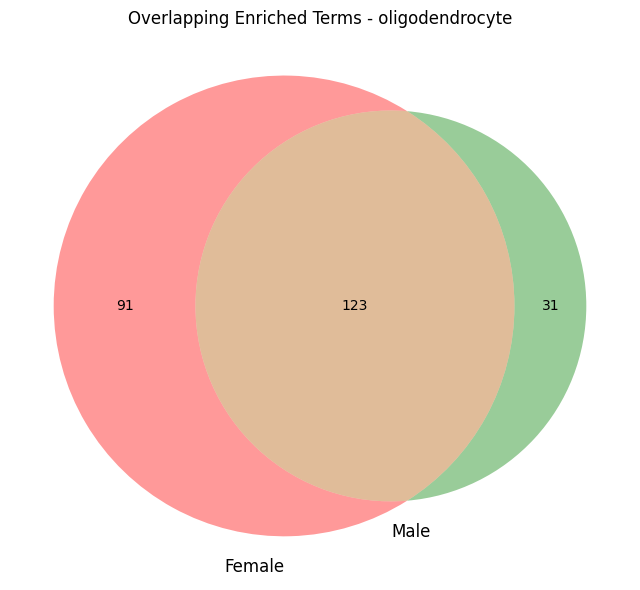

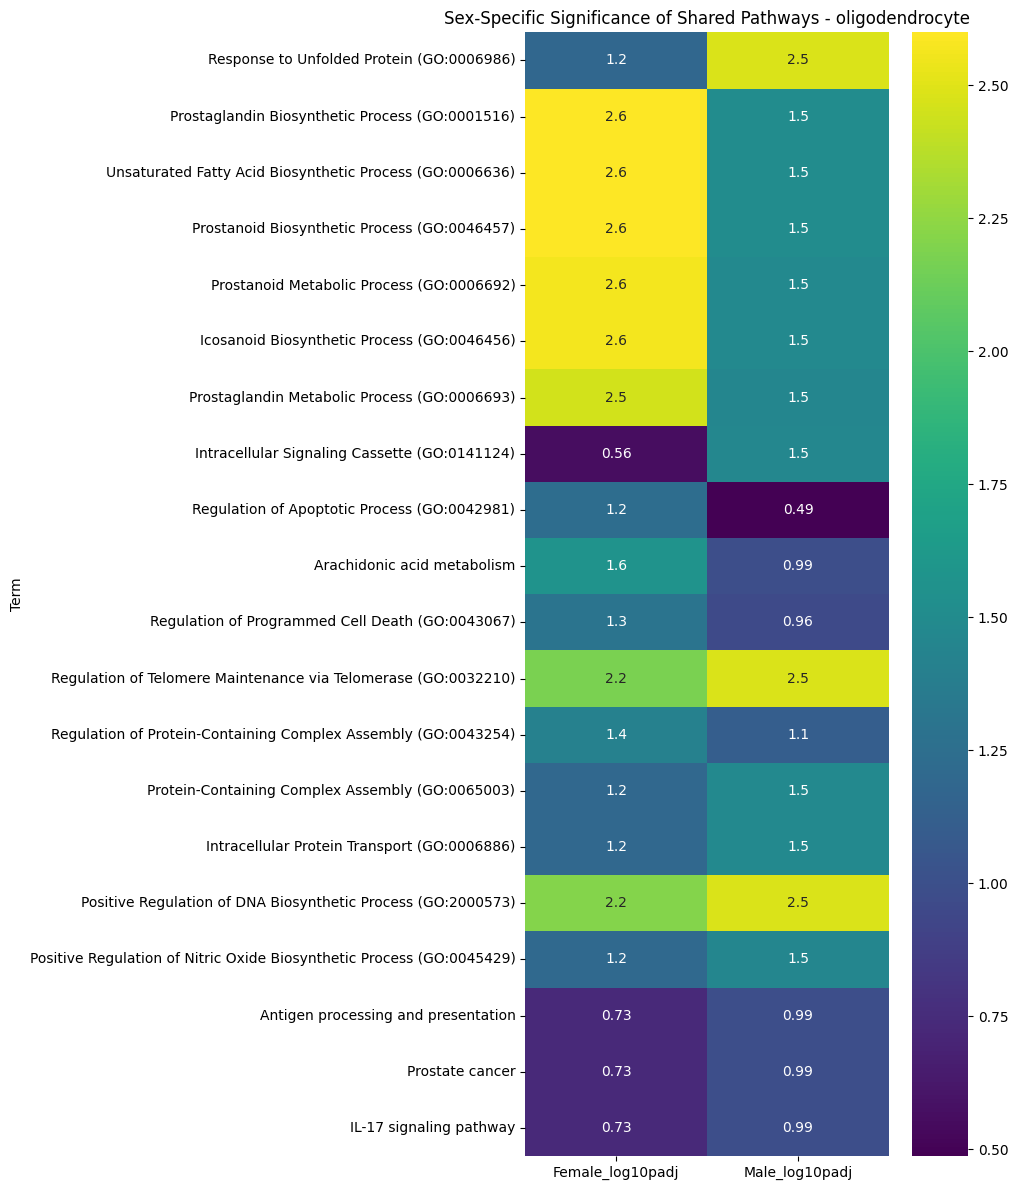

Creating visualizations for neuron


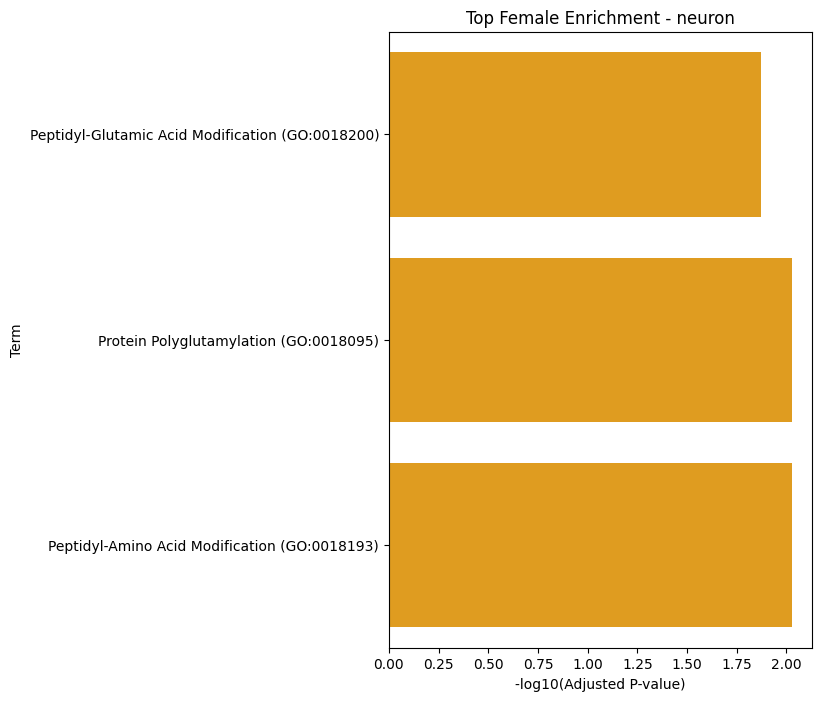

<ipython-input-22-ca038b621ae6>:150: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


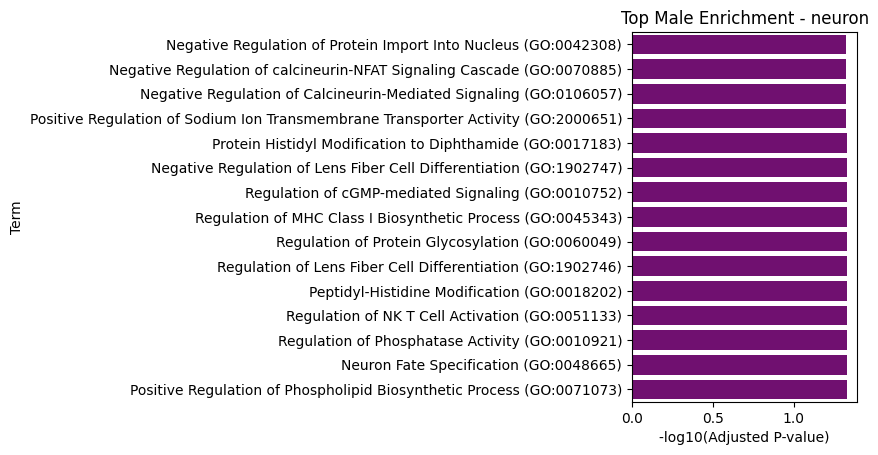

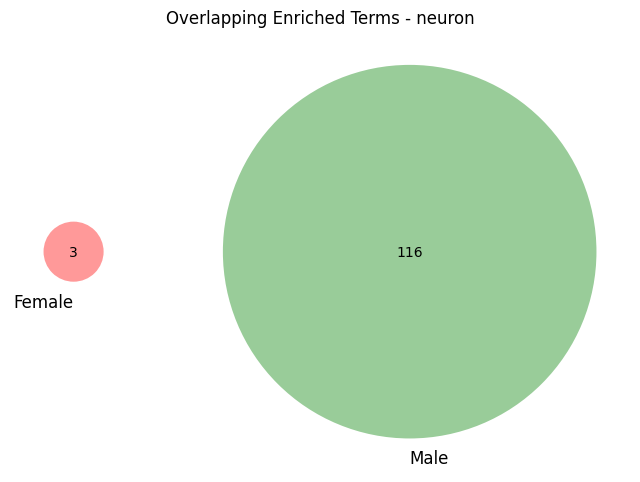


Analysis complete!


In [ ]:
import gseapy as gp
from matplotlib_venn import venn2
import seaborn as sns
import os

import time

def perform_enrichment(gene_sets, output_dir='enrichment_results', max_retries=5, backoff=2):
    gene_sets_db = ['GO_Biological_Process_2025', 'KEGG_2021_Human']
    enrichment_results = {}

    for cell_type, sex_data in gene_sets.items():
        print(f"Processing cell type: {cell_type}")
        enrichment_results[cell_type] = {}

        for sex, df_genes in sex_data.items():
            if df_genes is None or df_genes.empty:
                print(f"  Skipping {sex} (no data)")
                enrichment_results[cell_type][sex] = None
                continue

            genes = list(df_genes.index)
            if len(genes) < 10:
                print(f"  Skipping {sex} (too few genes: {len(genes)})")
                enrichment_results[cell_type][sex] = None
                continue

            all_results = []
            for gene_db in gene_sets_db:
                attempt = 0
                # deal with the fact that it kept erroring out and saying try again
                while attempt < max_retries:
                    try:
                        print(f"    [{sex}] Running ORA against {gene_db} (attempt {attempt+1})")
                        enr = gp.enrichr(
                            gene_list=genes,
                            gene_sets=gene_db,
                            organism='Human',
                            cutoff=0.05,
                            verbose=False
                        )
                        df = enr.results
                        if not df.empty:
                            df['Database'] = gene_db
                            all_results.append(df)
                        break
                    except Exception as e:
                        attempt += 1
                        print(f"      Error on {gene_db}: {e}. retrying in {backoff}s...")
                        time.sleep(backoff)
                else:
                    # we exhausted retries
                    print(f"      Failed {gene_db} after {max_retries} attempts, skipping.")

            if all_results:
                enrichment_results[cell_type][sex] = pd.concat(all_results, ignore_index=True)
            else:
                enrichment_results[cell_type][sex] = None
                print(f"  No successful enrichment for {sex} in {cell_type}")

    return enrichment_results


# Function to prepare gene sets from  results
def prepare_gene_sets(results, min_count=20):
    """
    Prepare gene sets from RandomForest results

    Parameters:
    -----------
    results : dict
        The results dictionary from code
    min_count : int
        Minimum count to include a gene

    Returns:
    --------
    dict
        Dictionary with structure: {cell_type: {'female': df_female, 'male': df_male}}
    """
    gene_sets = {}

    for cell_type, sex_data in results.items():
        gene_sets[cell_type] = {}

        # Get female and male data
        female_data = sex_data.get('female')
        male_data = sex_data.get('male')

        # Store with genes that pass the minimum count threshold
        if female_data is not None:
            gene_sets[cell_type]['female'] = female_data[female_data['count'] >= min_count]
        else:
            gene_sets[cell_type]['female'] = None

        if male_data is not None:
            gene_sets[cell_type]['male'] = male_data[male_data['count'] >= min_count]
        else:
            gene_sets[cell_type]['male'] = None

    return gene_sets

def visualize_enrichment(enrichment_results, output_dir='enrichment_plots'):
    """
    Create visualizations for enrichment results

    Parameters:
    -----------
    enrichment_results : dict
        Dictionary containing enrichment results
    output_dir : str
        Directory to save visualization plots
    """
    os.makedirs(output_dir, exist_ok=True)

    for cell_type, sex_data in enrichment_results.items():
        print(f"Creating visualizations for {cell_type}")


        female_results = sex_data.get('female')
        male_results = sex_data.get('male')

        # Create comparison plots if both sexes have results
        if female_results is not None and male_results is not None:
            # Get top terms for each sex (by adjusted p-value)
            female_top = female_results.sort_values('Adjusted P-value').head(15)
            male_top = male_results.sort_values('Adjusted P-value').head(15)

            # Create bar plots for top terms
            plt.figure(figsize=(12, 8))

            # Female plot
            plt.subplot(1, 2, 1)
            sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=female_top.assign(**{
                '-log10(Adjusted P-value)': -np.log10(female_top['Adjusted P-value'])
            }).sort_values('-log10(Adjusted P-value)'), color='orange')
            plt.title(f'Top Female Enrichment - {cell_type}')
            plt.show()
            plt.tight_layout()

            # Male plot
            plt.subplot(1, 2, 2)
            sns.barplot(x='-log10(Adjusted P-value)', y='Term', data=male_top.assign(**{
                '-log10(Adjusted P-value)': -np.log10(male_top['Adjusted P-value'])
            }).sort_values('-log10(Adjusted P-value)'), color='purple')
            plt.title(f'Top Male Enrichment - {cell_type}')
            plt.tight_layout()
            plt.show()
            plt.close()

            # Create Venn diagram of overlapping terms
            female_terms = set(female_results['Term'])
            male_terms = set(male_results['Term'])

            plt.figure(figsize=(8, 8))
            venn2([female_terms, male_terms], ('Female', 'Male'))
            plt.title(f'Overlapping Enriched Terms - {cell_type}')
            plt.show()
            plt.close()

            # Create heatmap of shared pathways
            shared_terms = list(female_terms.intersection(male_terms))
            if shared_terms:
                # Get data for shared terms
                shared_female = female_results[female_results['Term'].isin(shared_terms)]
                shared_male = male_results[male_results['Term'].isin(shared_terms)]

                # Merge data
                merged = pd.merge(
                    shared_female[['Term', 'Adjusted P-value']].rename(columns={'Adjusted P-value': 'Female_padj'}),
                    shared_male[['Term', 'Adjusted P-value']].rename(columns={'Adjusted P-value': 'Male_padj'}),
                    on='Term'
                )

                # Create log-transformed values for better visualization
                merged['Female_log10padj'] = -np.log10(merged['Female_padj'])
                merged['Male_log10padj'] = -np.log10(merged['Male_padj'])

                # Sort by difference in significance
                merged['diff'] = np.abs(merged['Female_log10padj'] - merged['Male_log10padj'])
                merged = merged.sort_values('diff', ascending=False).head(20)

                # Create heatmap data
                heatmap_data = merged.set_index('Term')[['Female_log10padj', 'Male_log10padj']]

                # Plot heatmap
                plt.figure(figsize=(10, 12))
                sns.heatmap(heatmap_data, cmap='viridis', annot=True)
                plt.title(f'Sex-Specific Significance of Shared Pathways - {cell_type}')
                plt.tight_layout()
                plt.show()
                plt.close()



# main
def main():
    # Prepare gene sets from results
    gene_sets = prepare_gene_sets(results, min_count=20)

    # Using gseapy
    print("Performing enrichment analysis with gseapy...")
    enrichment_results = perform_enrichment(gene_sets)
    visualize_enrichment(enrichment_results)


    # Return results
    return {
        'gene_sets': gene_sets,
        'enrichment_results': enrichment_results
    }

# Execute main
if __name__ == "__main__":
    analysis_results = main()